In [ ]:
install.packages("xlsx", dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘rex’, ‘rJava’, ‘xlsxjars’, ‘covr’


Warning message in install.packages("xlsx", dependencies = TRUE):
“installation of package ‘rJava’ had non-zero exit status”
Warning message in install.packages("xlsx", dependencies = TRUE):
“installation of package ‘xlsxjars’ had non-zero exit status”
Warning message in install.packages("xlsx", dependencies = TRUE):
“installation of package ‘xlsx’ had non-zero exit status”


In [ ]:
# https://docs.google.com/spreadsheets/d/1tp109ByNBK_aliI15i2ld9haK4Hvtuns/edit?usp=drive_link&ouid=101818153396750477262&rtpof=true&sd=true

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# ADD 2022

## Data augmentation 비교

In [ ]:
library(tidyverse)
library(readxl)
library(dplyr)
suppressWarnings({system("gdown --id 1tp109ByNBK_aliI15i2ld9haK4Hvtuns")
data_add = read_excel("최종_Results_DA_ADD.xlsx")
})

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
data_add %>% head()

model,beta_param,specaug,cutout,cutmix,lowpass,highpass,ranfilter2,filteraug_linear,filteraug_step,eer_val,eer_eval,aug
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
BCResMax_ADD_,0,FALSE,0,0.9,FALSE,FALSE,FALSE,-999,NA,0.0003,12.69,cutmix
BCResMax_ADD_,0,FALSE,0,0.9,FALSE,FALSE,FALSE,-999,NA,7.6884,14.16,cutmix
BCResMax_ADD_,0,FALSE,0,0.9,FALSE,FALSE,FALSE,-999,NA,0.0003,15.10,cutmix
DDWSseq_ADD_,0,FALSE,0,0.9,FALSE,FALSE,FALSE,-999,"[[3, 6], 10, 'step', [-10, 10]]",0.0003,13.32,cutmix
DDWSseq_ADD_,0,FALSE,0,0.9,FALSE,FALSE,FALSE,-999,NA,0.0004,14.72,cutmix
DDWSseq_ADD_,0,FALSE,0,0.9,FALSE,FALSE,FALSE,-999,NA,0.0002,15.10,cutmix


In [ ]:
ADD <- data_add   %>%
  group_by(aug,model) %>% summarize(m_EER = mean(eer_eval))

`summarise()` has grouped output by 'aug'. You can override using the `.groups`
argument.


In [ ]:
write.csv(ADD, file = 'add_mean.csv')

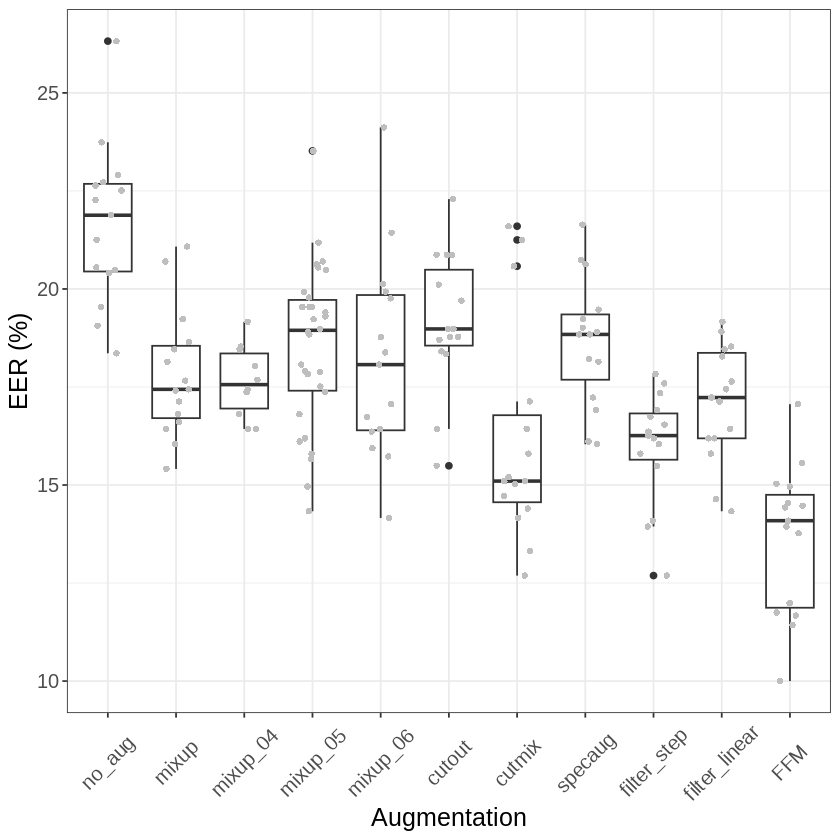

In [ ]:
data_add %>%
   ggplot(aes(x = factor(aug, levels = c("no_aug", "mixup", "mixup_04","mixup_05" ,"mixup_06","cutout", "cutmix", "specaug", "filter_step", "filter_linear", "FFM" )) ,y=eer_eval)) + theme_bw() + #geom_violin() +
    geom_boxplot(width=0.7)+ geom_jitter(shape=16, position=position_jitter(0.2), color = "grey")+
  theme(axis.line = element_blank(),
#          panel.grid.major = element_blank(),
          panel.background = element_blank(),
          strip.background = element_blank(),
          axis.text.x = element_text(angle= 45, vjust = .5)
#          axis.text.y = element_blank()
  ) +
    theme(legend.position = "right", text = element_text(size = 15), plot.title = element_text(hjust = 0.5, size = 20) ) +
        xlab('Augmentation') + ylab('EER (%)') #+ ggtitle('M+LF, M+LF+RF worked best')

In [ ]:
# mixup은 0.7 적용한 결과 사용
data_filtered <- data_add %>%
  filter(aug %in% c("no_aug", "mixup","cutout", "cutmix", "specaug", "filter_step", "filter_linear", "FFM"))


data_filtered$aug <- factor(data_filtered$aug, levels = c("no_aug","mixup" ,"cutout", "cutmix", "specaug", "filter_step", "filter_linear", "FFM"),labels = c("None", "Mixup", "Cutout", "CutMix", "SpecAug", "Filter_S", "Filter_L", "FFM"))


In [ ]:
data_filtered %>% str()

tibble [120 × 13] (S3: tbl_df/tbl/data.frame)
 $ model           : chr [1:120] "BCResMax_ADD_" "BCResMax_ADD_" "BCResMax_ADD_" "DDWSseq_ADD_" ...
 $ beta_param      : num [1:120] 0 0 0 0 0 0 0 0 0 0 ...
 $ specaug         : chr [1:120] "FALSE" "FALSE" "FALSE" "FALSE" ...
 $ cutout          : num [1:120] 0 0 0 0 0 0 0 0 0 0 ...
 $ cutmix          : num [1:120] 0.9 0.9 0.9 0.9 0.9 0.9 0.2 0.2 0.2 0.7 ...
 $ lowpass         : chr [1:120] "FALSE" "FALSE" "FALSE" "FALSE" ...
 $ highpass        : chr [1:120] "FALSE" "FALSE" "FALSE" "FALSE" ...
 $ ranfilter2      : chr [1:120] "FALSE" "FALSE" "FALSE" "FALSE" ...
 $ filteraug_linear: chr [1:120] "-999" "-999" "-999" "-999" ...
 $ filteraug_step  : chr [1:120] NA NA NA "[[3, 6], 10, 'step', [-10, 10]]" ...
 $ eer_val         : num [1:120] 0.0003 7.6884 0.0003 0.0003 0.0004 ...
 $ eer_eval        : num [1:120] 12.7 14.2 15.1 13.3 14.7 ...
 $ aug             : Factor w/ 8 levels "None","Mixup",..: 4 4 4 4 4 4 4 4 4 4 ...


In [ ]:
library(RColorBrewer)

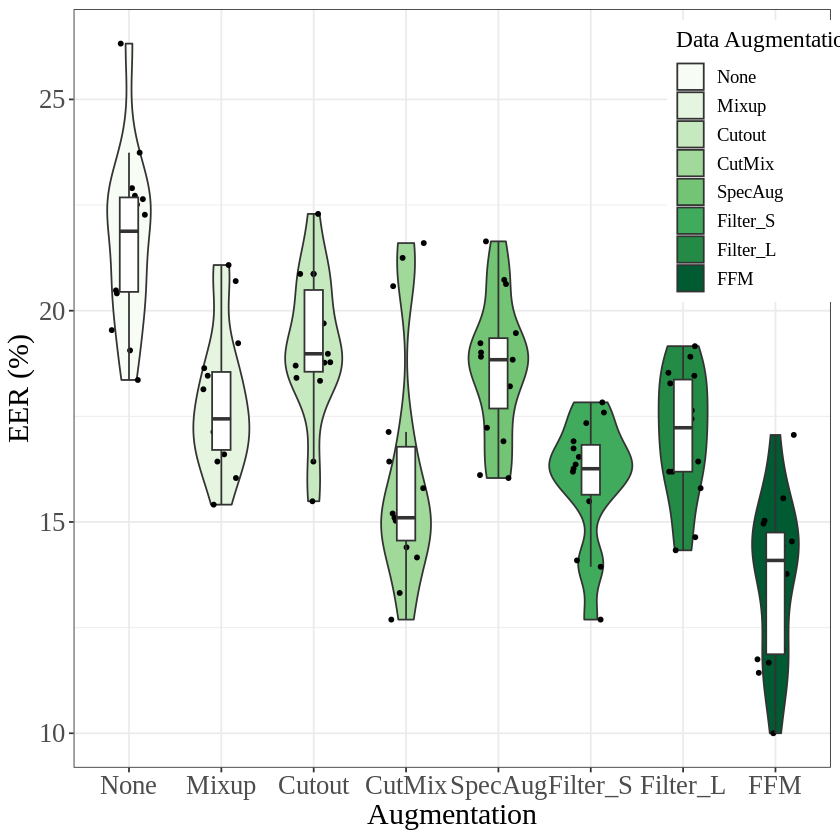

In [ ]:
ggplot(data_filtered, aes(x =aug, y=eer_eval, fill=factor(aug))) +
  theme_bw() +
  geom_violin() +
  geom_jitter(width = 0.2, size = 1, color = "black",show.legend = FALSE) +
  geom_boxplot(width = 0.2, fill = "white", outlier.shape = NA) +
  labs(x = "aug", y = "eer_eval", fill = "Data Augmentation:", size=16)  +
  theme(
      text = element_text(size = 14, family = "Times New Roman"),
      axis.title = element_text(size = 18),
      axis.text.x = element_text(size = 16), # 축 제목과 라벨 사이의 간격
      axis.text.y = element_text(size = 16),
      panel.background = element_blank(),
      strip.background = element_blank(),
      legend.position = c(0.92,0.8),
      legend.box = "horizontal"
  )+
     xlab('Augmentation') + ylab('EER (%)') + #+ ggtitle('M+LF, M+LF+RF worked best')
     scale_fill_brewer(palette="Greens")
# scale_fill_manual(values = c("#FF7F00","#4DAF4A","#619CFF","#F564E3","#959595","gold","#00BFC4","red"),
# labels = c("None", "Mixup", "Cutout", "CutMix", "SpecAug", "Filter_S", "Filter_L", "FFM"))
 #scale_fill_brewer(palette="Paired") +



In [ ]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("cowplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("extrafont")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’




In [ ]:
library(gridExtra)
library(cowplot)
library(extrafont)

# Register fonts
font_import()
loadfonts(device = "win")


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registering fonts with R



Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n] 


Exiting.

Warning message in loadfonts_win(quiet = quiet):
“OS is not Windows. No fonts registered with windowsFonts().”


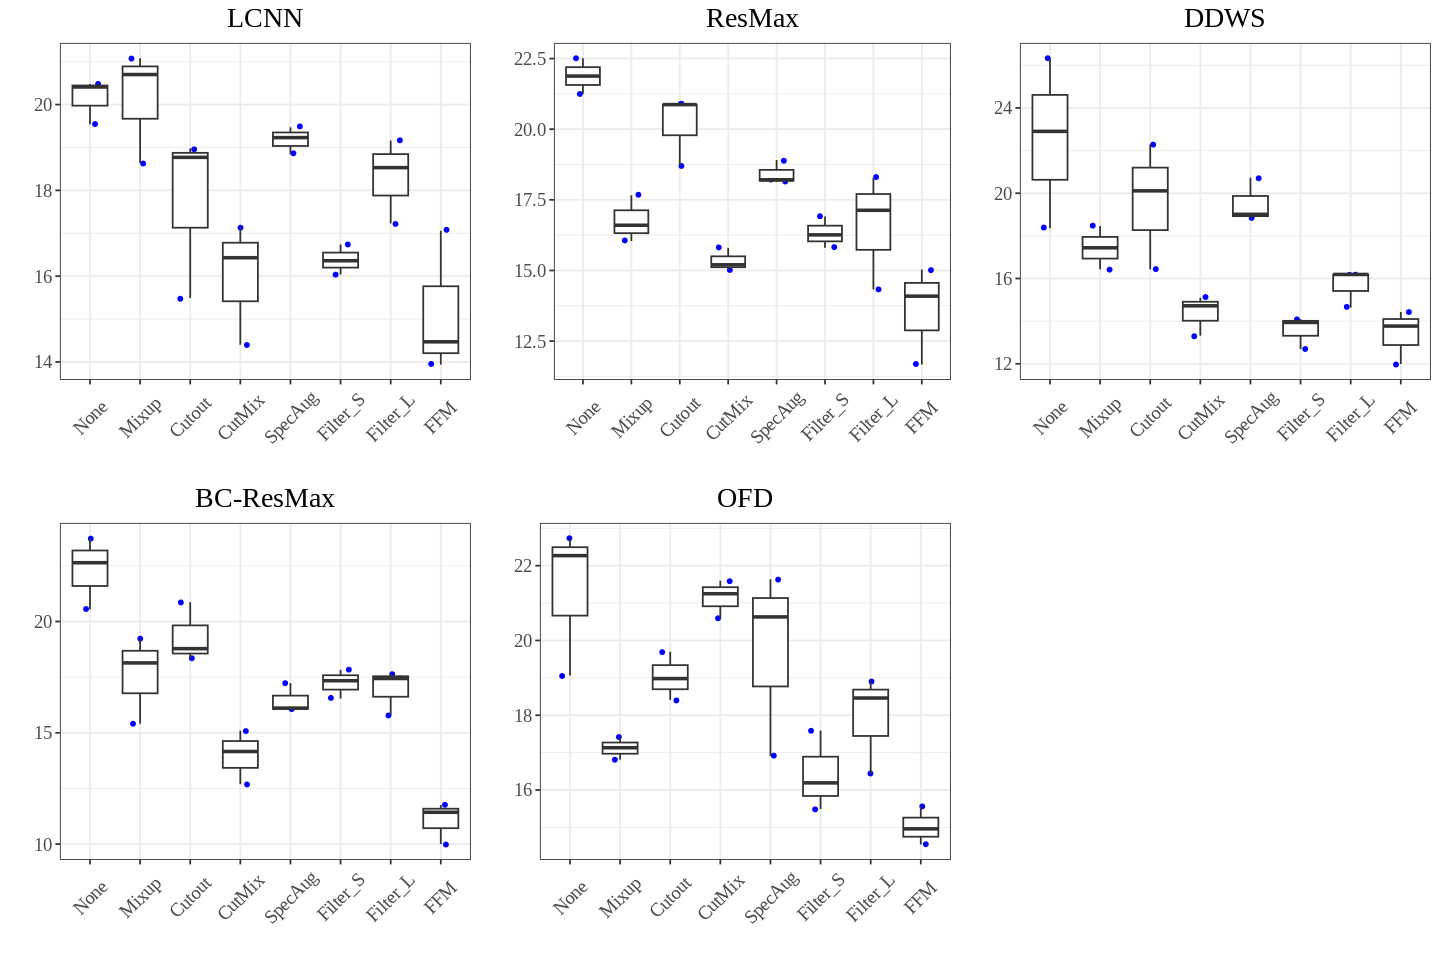

In [ ]:
suppressWarnings({

# Set figure size
options(repr.plot.width = 12, repr.plot.height = 8)

# Plot for each model
p1 <- ggplot(data_filtered[data_filtered$model == 'LCNN_ADD_',],
aes(x = aug,  y=eer_eval, fill = aug)) +
theme_bw() +

# geom_violin() +
geom_jitter(width = 0.2, size = 1, color = "blue",show.legend = FALSE) +
geom_boxplot(width = 0.7, fill = "white", outlier.shape = NA) +
labs(x = "aug", y = "eer_eval", fill = "Data Augmentation:", size=16) +
theme(
plot.title = element_text(hjust = 0.5),
text = element_text(size = 14, family = "Times New Roman"),
panel.background = element_blank(),
strip.background = element_blank(),
axis.text.x = element_text(angle= 45, vjust = .5),
legend.position = "none"
) + ggtitle('LCNN') +
xlab('') + ylab('') +
scale_fill_manual(values = c("#FF7F00","#4DAF4A","#619CFF","#F564E3","#959595","gold","#00BFC4","red"),
labels = c("None", "Mixup", "Cutout", "CutMix", "SpecAug", "Filter_S", "Filter_L", "FFM"))

# Repeat the process for other models
p2 <- p1 %+% data_filtered[data_filtered$model == 'ResMax_ADD_',] + ggtitle('ResMax')
p3 <- p1 %+% data_filtered[data_filtered$model == 'DDWSseq_ADD_',] + ggtitle('DDWS')
p4 <- p1 %+% data_filtered[data_filtered$model == 'BCResMax_ADD_',] + ggtitle('BC-ResMax')
p5 <- p1 %+% data_filtered[data_filtered$model == 'OFD_ADD_',] + ggtitle('OFD') + theme(legend.position = c(.4, .76))

# Extract legend
p6 <- get_legend(p5 + theme(legend.box = "vertical") + guides(fill=guide_legend(ncol=2, nrow=4)))
p5 <- p5 + theme(legend.position = "none")

# Define layout
lay <- rbind(c(1, 2, 3),
c(4, 5, 6))

# Combine plots
img <- grid.arrange(p1, p2, p3, p4, p5, p6, layout_matrix = lay)
ggsave(file = "add_DA.png", plot = img, dpi = 300, width = 12, height = 8)

# png(file = "modelo1.png", width = 800, height = 480)
# grid.arrange(p1, p2, nrow=1)
# dev.off()
})

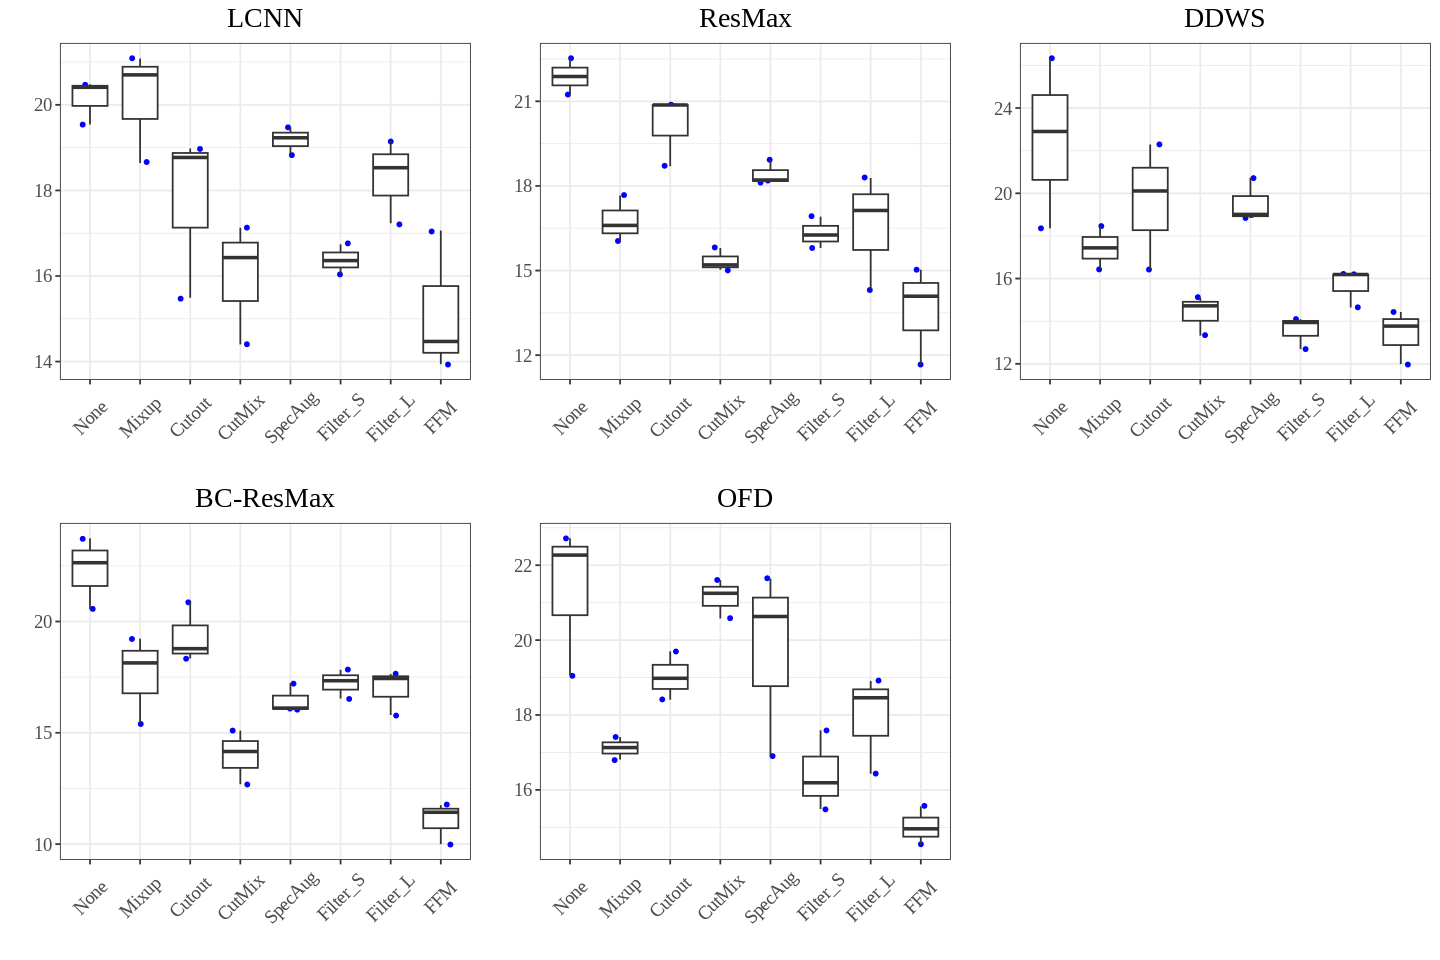

In [ ]:
suppressWarnings({
# Set figure size
options(repr.plot.width = 12, repr.plot.height = 8)

# Plot for each model
p1 <- ggplot(data_filtered[data_filtered$model == 'LCNN_ADD_',],
aes(x = aug,  y=eer_eval, fill = aug)) +
  theme_bw() +
#   geom_violin() +
  geom_jitter(width = 0.2, size = 1, color = "blue",show.legend = FALSE) +
  geom_boxplot(width = 0.7, fill = "white", outlier.shape = NA) +
  labs(x = "aug", y = "eer_eval", fill = "Data Augmentation:", size=16) +
  theme(
    plot.title = element_text(hjust = 0.5),
    text = element_text(size = 14, family = "Times New Roman"),
    panel.background = element_blank(),
    strip.background = element_blank(),
    axis.text.x = element_text(angle= 45, vjust = .5),
    legend.position = "none"
  ) + ggtitle('LCNN') +
  xlab('') + ylab('') +
  scale_fill_manual(values = c("#FF7F00","#4DAF4A","#619CFF","#F564E3","#959595","gold","#00BFC4","red"),
                    labels = c("None", "Mixup", "Cutout", "CutMix", "SpecAug", "Filter_S", "Filter_L", "FFM"))


# Repeat the process for other models
p2 <- p1 %+% data_filtered[data_filtered$model == 'ResMax_ADD_',] + ggtitle('ResMax')
p3 <- p1 %+% data_filtered[data_filtered$model == 'DDWSseq_ADD_',] + ggtitle('DDWS')
p4 <- p1 %+% data_filtered[data_filtered$model == 'BCResMax_ADD_',] + ggtitle('BC-ResMax')
p5 <- p1 %+% data_filtered[data_filtered$model == 'OFD_ADD_',] + ggtitle('OFD') + theme(legend.position = c(.4, .76))

# Extract legend
p6 <- get_legend(p5 + theme(legend.box = "vertical") + guides(fill=guide_legend(ncol=2, nrow=4)))
p5 <- p5 + theme(legend.position = "none")

# Define layout
lay <- rbind(c(1, 2, 3),
             c(4, 5, 6))


# Combine plots
img <- grid.arrange(p1, p2, p3, p4, p5, p6, layout_matrix = lay)
ggsave(file = "add_DA.png", plot = img, dpi = 300, width = 12, height = 8)



# png(file = "modelo1.png", width = 800, height = 480)
# grid.arrange(p1, p2, nrow=1)
# dev.off()


})

In [ ]:
# Calculate mean and standard deviation
data_filtered <- data_filtered %>%
  group_by(model, aug) %>%
  mutate(mean = mean(eer_eval),
         sd = sd(eer_eval))

In [ ]:
data_filtered %>% head()

model,beta_param,specaug,cutout,cutmix,lowpass,highpass,ranfilter2,filteraug_linear,filteraug_step,eer_val,eer_eval,aug,mean,sd
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
BCResMax_ADD_,0,FALSE,0,0.9,FALSE,FALSE,FALSE,-999,NA,0.0003,12.69,CutMix,13.98333,1.2146742
BCResMax_ADD_,0,FALSE,0,0.9,FALSE,FALSE,FALSE,-999,NA,7.6884,14.16,CutMix,13.98333,1.2146742
BCResMax_ADD_,0,FALSE,0,0.9,FALSE,FALSE,FALSE,-999,NA,0.0003,15.10,CutMix,13.98333,1.2146742
DDWSseq_ADD_,0,FALSE,0,0.9,FALSE,FALSE,FALSE,-999,"[[3, 6], 10, 'step', [-10, 10]]",0.0003,13.32,CutMix,14.38000,0.9374433
DDWSseq_ADD_,0,FALSE,0,0.9,FALSE,FALSE,FALSE,-999,NA,0.0004,14.72,CutMix,14.38000,0.9374433
DDWSseq_ADD_,0,FALSE,0,0.9,FALSE,FALSE,FALSE,-999,NA,0.0002,15.10,CutMix,14.38000,0.9374433


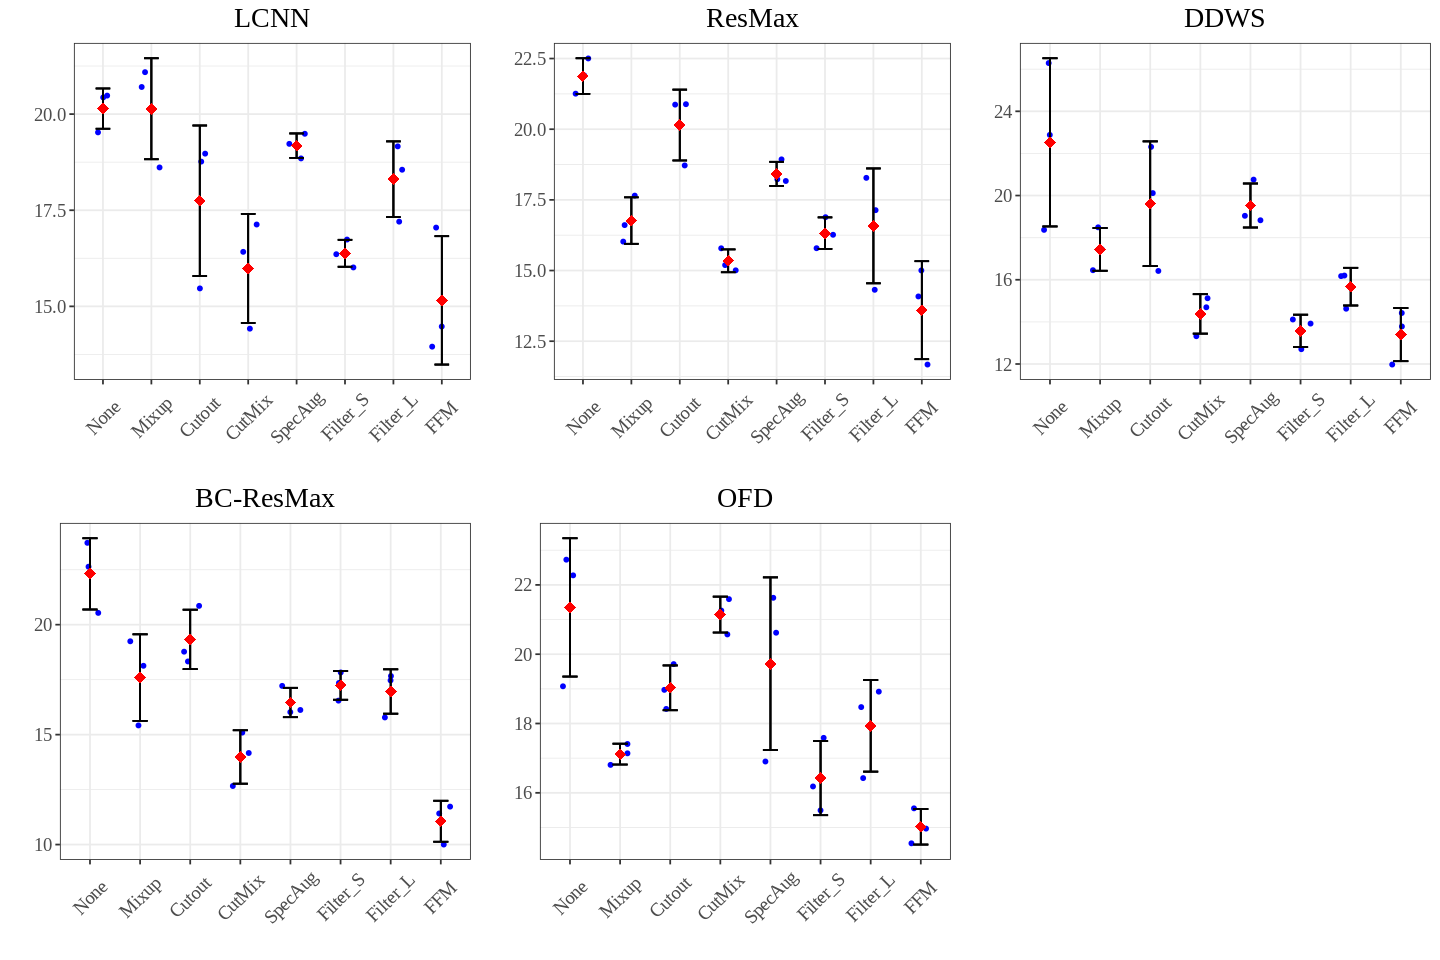

In [ ]:
# Set figure size
options(repr.plot.width = 12, repr.plot.height = 8)


# Plot for each model
p1 <- ggplot(data_filtered[data_filtered$model == 'LCNN_ADD_',],
aes(x = aug,  y=eer_eval, fill = aug)) +
  theme_bw() +
  geom_jitter(width = 0.2, size = 1, color = "blue",show.legend = FALSE) +
  geom_errorbar(aes(ymin = mean - sd, ymax = mean + sd, y = mean), width = 0.3, color = "black") +
  geom_point(aes(y = mean), color = "red", size = 3, shape=18) +   # 그룹 평균값표시


  theme(
    plot.title = element_text(hjust = 0.5),
    text = element_text(size = 14, family = "Times New Roman"),
    panel.background = element_blank(),
    strip.background = element_blank(),
    axis.text.x = element_text(angle= 45, vjust = .5),
    legend.position = "none" # Add this line to hide legend
  ) + ggtitle('LCNN') +
  xlab('') + ylab('')



# Repeat the process for other models
p2 <- p1 %+% data_filtered[data_filtered$model == 'ResMax_ADD_',] + ggtitle('ResMax')
p3 <- p1 %+% data_filtered[data_filtered$model == 'DDWSseq_ADD_',] + ggtitle('DDWS')
p4 <- p1 %+% data_filtered[data_filtered$model == 'BCResMax_ADD_',] + ggtitle('BC-ResMax')
p5 <- p1 %+% data_filtered[data_filtered$model == 'OFD_ADD_',] + ggtitle('OFD')


# Combine plots
img <- grid.arrange(p1, p2, p3, p4, p5,  layout_matrix = lay)


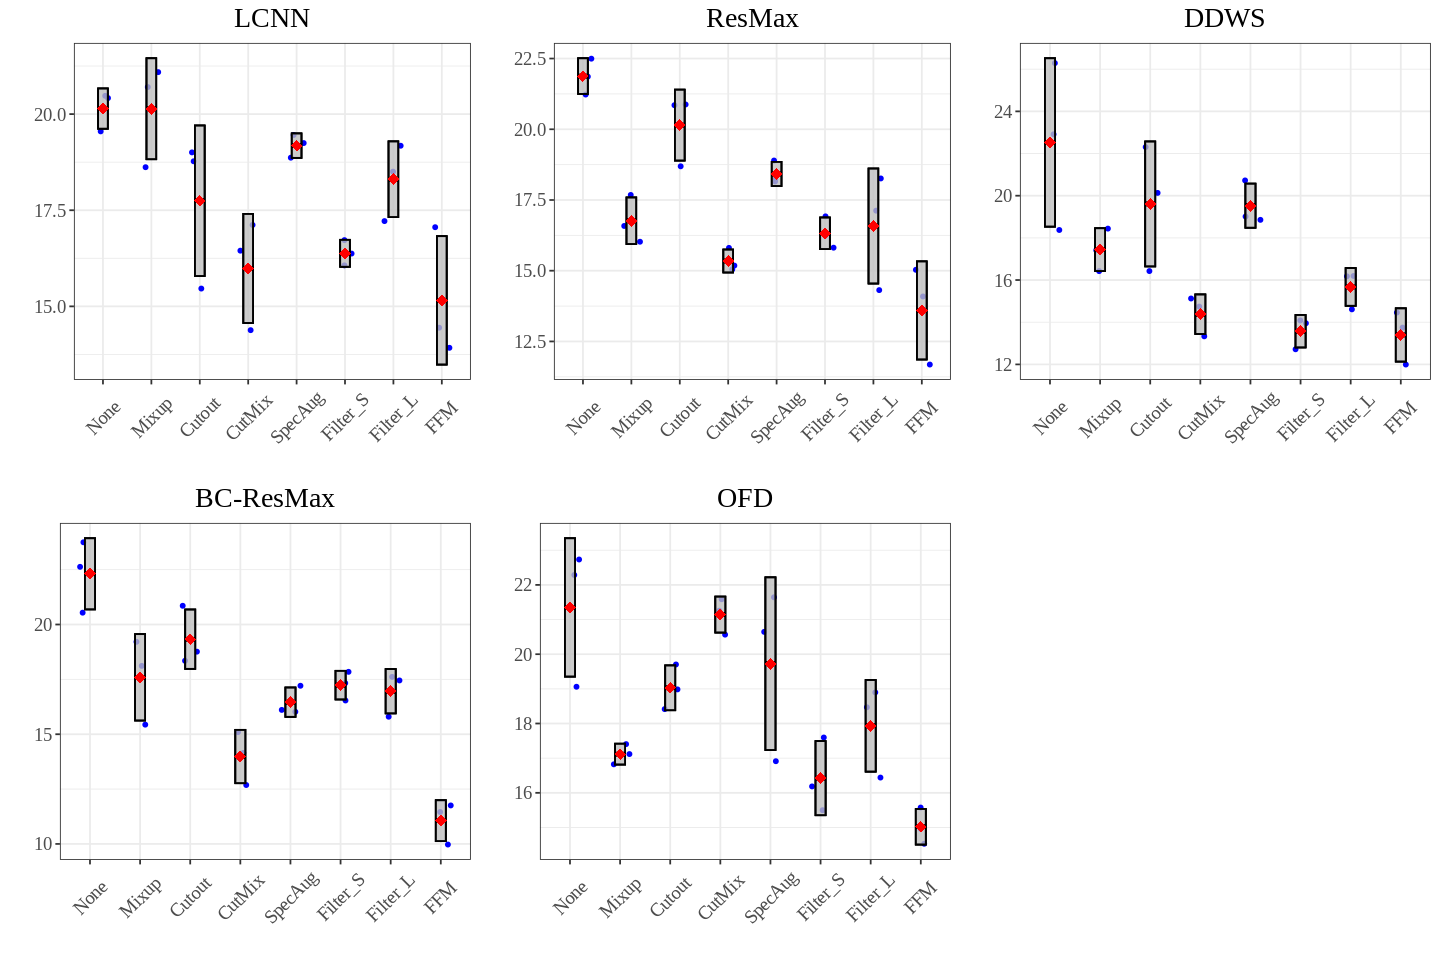

In [ ]:
# Set figure size
options(repr.plot.width = 12, repr.plot.height = 8)


# Plot for each model
p1 <- ggplot(data_filtered[data_filtered$model == 'LCNN_ADD_',],
aes(x = aug,  y=eer_eval, fill = aug)) +
  theme_bw() +
  geom_jitter(width = 0.2, size = 1, color = "blue",show.legend = FALSE) +
  geom_crossbar(aes(ymin = mean - sd, ymax = mean + sd, y = mean), width = 0.2, color = "black", fill = "grey", alpha = 0.4) +
  geom_point(aes(y = mean), color = "red", size = 3, shape=18) +   # 그룹 평균값표시


  theme(
    plot.title = element_text(hjust = 0.5),
    text = element_text(size = 14, family = "Times New Roman"),
    panel.background = element_blank(),
    strip.background = element_blank(),
    axis.text.x = element_text(angle= 45, vjust = .5),
    legend.position = "none" # Add this line to hide legend
  ) + ggtitle('LCNN') +
  xlab('') + ylab('')



# Repeat the process for other models
p2 <- p1 %+% data_filtered[data_filtered$model == 'ResMax_ADD_',] + ggtitle('ResMax')
p3 <- p1 %+% data_filtered[data_filtered$model == 'DDWSseq_ADD_',] + ggtitle('DDWS')
p4 <- p1 %+% data_filtered[data_filtered$model == 'BCResMax_ADD_',] + ggtitle('BC-ResMax')
p5 <- p1 %+% data_filtered[data_filtered$model == 'OFD_ADD_',] + ggtitle('OFD')


# Combine plots
img <- grid.arrange(p1, p2, p3, p4, p5,  layout_matrix = lay)


## wilcox test

In [ ]:
base_add = data_filtered %>% filter(aug == "None") %>% select(eer_eval)
mixup_add = data_filtered %>% filter(aug == "Mixup") %>% select(eer_eval)
cutout_add = data_filtered %>% filter(aug == "Cutout") %>% select(eer_eval)
cutmix_add = data_filtered %>% filter(aug == "CutMix") %>% select(eer_eval)
specaug_add = data_filtered %>% filter(aug == "SpecAug") %>% select(eer_eval)
filter_step_add = data_filtered %>% filter(aug == "Filter_S") %>% select(eer_eval)
filter_linear_add = data_filtered %>% filter(aug == "Filter_L") %>% select(eer_eval)
ffm_add = data_filtered %>% filter(aug == "FFM") %>% select(eer_eval)



Adding missing grouping variables: `model`, `aug`
Adding missing grouping variables: `model`, `aug`
Adding missing grouping variables: `model`, `aug`
Adding missing grouping variables: `model`, `aug`
Adding missing grouping variables: `model`, `aug`
Adding missing grouping variables: `model`, `aug`
Adding missing grouping variables: `model`, `aug`
Adding missing grouping variables: `model`, `aug`


In [ ]:
kruskal.test(eer_eval ~ model, data= data_filtered)


	Kruskal-Wallis rank sum test

data:  eer_eval by model
Kruskal-Wallis chi-squared = 5.9455, df = 4, p-value = 0.2033


### FFM vs base

In [ ]:
adjusted_alpha <- 0.05/7
adjusted_alpha

[1] 0.007142857

In [ ]:
# 1. FFM vs base
wilcox.test(base_add$eer_eval, ffm_add$eer_eval, "greater")


	Wilcoxon rank sum exact test

data:  base_add$eer_eval and ffm_add$eer_eval
W = 225, p-value = 6.447e-09
alternative hypothesis: true location shift is greater than 0


In [ ]:
# 1. FFM vs base
p_value <- wilcox.test(base_add$eer_eval, ffm_add$eer_eval, "greater")$p.value

# 본페로니 보정
cat(paste("검정: ", adjusted_alpha > p_value, "\n"))

검정:  TRUE 


In [ ]:
# 2. FFM vs Mixup
wilcox.test(mixup_add$eer_eval, ffm_add$eer_eval, "greater")


	Wilcoxon rank sum exact test

data:  mixup_add$eer_eval and ffm_add$eer_eval
W = 219, p-value = 1.934e-07
alternative hypothesis: true location shift is greater than 0


In [ ]:
p_value <- wilcox.test(mixup_add$eer_eval, ffm_add$eer_eval, "greater")$p.value

# 본페로니 보정
cat(paste("검정: ", adjusted_alpha > p_value, "\n"))

검정:  TRUE 


In [ ]:
# 3. FFM vs Cutout
wilcox.test(cutout_add$eer_eval, ffm_add$eer_eval, "greater")

Warning message in wilcox.test.default(cutout_add$eer_eval, ffm_add$eer_eval, "greater"):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  cutout_add$eer_eval and ffm_add$eer_eval
W = 222, p-value = 3.039e-06
alternative hypothesis: true location shift is greater than 0


In [ ]:
p_value <- wilcox.test(cutout_add$eer_eval, ffm_add$eer_eval, "greater")$p.value

# 본페로니 보정
cat(paste("검정: ", adjusted_alpha > p_value, "\n"))

Warning message in wilcox.test.default(cutout_add$eer_eval, ffm_add$eer_eval, "greater"):
“cannot compute exact p-value with ties”


검정:  TRUE 


In [ ]:
# 4. FFM vs CutMix
wilcox.test(cutmix_add$eer_eval, ffm_add$eer_eval, "greater")

Warning message in wilcox.test.default(cutmix_add$eer_eval, ffm_add$eer_eval, "greater"):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  cutmix_add$eer_eval and ffm_add$eer_eval
W = 176.5, p-value = 0.004214
alternative hypothesis: true location shift is greater than 0


In [ ]:
p_value <- wilcox.test(cutmix_add$eer_eval, ffm_add$eer_eval, "greater")$p.value

# 본페로니 보정
cat(paste("검정: ", adjusted_alpha > p_value, "\n"))

Warning message in wilcox.test.default(cutmix_add$eer_eval, ffm_add$eer_eval, "greater"):
“cannot compute exact p-value with ties”


검정:  TRUE 


In [ ]:
# 5. FFM vs SpecAugment
wilcox.test(specaug_add$eer_eval, ffm_add$eer_eval, "greater")

Warning message in wilcox.test.default(specaug_add$eer_eval, ffm_add$eer_eval, "greater"):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  specaug_add$eer_eval and ffm_add$eer_eval
W = 222, p-value = 3.069e-06
alternative hypothesis: true location shift is greater than 0


In [ ]:
p_value <- wilcox.test(specaug_add$eer_eval, ffm_add$eer_eval, "greater")$p.value

# 본페로니 보정
cat(paste("검정: ", adjusted_alpha > p_value, "\n"))

Warning message in wilcox.test.default(specaug_add$eer_eval, ffm_add$eer_eval, "greater"):
“cannot compute exact p-value with ties”


검정:  TRUE 


In [ ]:
# 6. FFM vs FilterAugment-step
wilcox.test(filter_step_add$eer_eval, ffm_add$eer_eval, "greater")

Warning message in wilcox.test.default(filter_step_add$eer_eval, ffm_add$eer_eval, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  filter_step_add$eer_eval and ffm_add$eer_eval
W = 189, p-value = 0.0008079
alternative hypothesis: true location shift is greater than 0


In [ ]:
p_value <- wilcox.test(filter_step_add$eer_eval, ffm_add$eer_eval, "greater")$p.value

# 본페로니 보정
cat(paste("검정: ", adjusted_alpha > p_value, "\n"))

Warning message in wilcox.test.default(filter_step_add$eer_eval, ffm_add$eer_eval, :
“cannot compute exact p-value with ties”


검정:  TRUE 


In [ ]:
# 7. FFM vs FilterAugment-linear
wilcox.test(filter_linear_add$eer_eval, ffm_add$eer_eval, "greater")

Warning message in wilcox.test.default(filter_linear_add$eer_eval, ffm_add$eer_eval, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  filter_linear_add$eer_eval and ffm_add$eer_eval
W = 210, p-value = 2.863e-05
alternative hypothesis: true location shift is greater than 0


In [ ]:
p_value <- wilcox.test(filter_linear_add$eer_eval, ffm_add$eer_eval, "greater")$p.value

# 본페로니 보정
cat(paste("검정: ", adjusted_alpha > p_value, "\n"))

Warning message in wilcox.test.default(filter_linear_add$eer_eval, ffm_add$eer_eval, :
“cannot compute exact p-value with ties”


검정:  TRUE 


# ASV 2019 LA

In [ ]:
suppressWarnings({system("gdown --id 1gWnIWxgzM2W0pl2FXq79Nj01Tx7SVBGu")
data_asv = read_excel("최종_Results_DA_ASV.xlsx")
})

In [ ]:
asv<-data_asv   %>%
  group_by(aug,model) %>% summarize(m_EER = mean(eer_eval))

`summarise()` has grouped output by 'aug'. You can override using the `.groups`
argument.


In [ ]:
write.csv(asv, file = 'asv_mean.csv')

In [ ]:
asv

aug,model,m_EER
<chr>,<chr>,<dbl>
FFM,BCResMax_LA_,2.466667
FFM,DDWSseq_LA_,2.446667
FFM,LCNN_LA_,1.926667
FFM,OFD_LA_,1.486667
FFM,ResMax_LA_,2.080000
cutmix,BCResMax_LA_,2.700000
cutmix,DDWSseq_LA_,3.760000
cutmix,LCNN_LA_,3.556667
cutmix,OFD_LA_,3.093333


In [ ]:
data_asv$aug <- factor(data_asv$aug, levels = c("no_aug","mixup" ,"cutout", "cutmix", "specaug", "filter_step", "filter_linear", "FFM"),labels = c("None", "Mixup", "Cutout", "CutMix", "SpecAug", "Filter_S", "Filter_L", "FFM"))


In [ ]:
data_asv %>% head()

model,beta_param,specaug,cutout,cutmix,lowpass,highpass,ranfilter2,filteraug_linear,filteraug_step,eer_val,eer_eval,aug
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<fct>
BCResMax_LA_,0,FALSE,0,0.0,FALSE,FALSE,FALSE,"[[3, 6], 2, 'linear', [-6, 6]]",FALSE,0.0055,2.27,Filter_L
BCResMax_LA_,0,FALSE,0,0.0,FALSE,FALSE,FALSE,"[[5, 8], 2, 'linear', [-1, 1]]",FALSE,0.0054,2.39,Filter_L
BCResMax_LA_,0,FALSE,0,0.0,FALSE,FALSE,FALSE,"[[2, 5], 10, 'linear', [-6, 6]]",FALSE,0.0084,2.40,Filter_L
BCResMax_LA_,0,FALSE,0,0.0,FALSE,FALSE,FALSE,FALSE,"[[5, 8], 8, 'step', [-1, 1]]",0.0043,2.43,Filter_S
BCResMax_LA_,0,FALSE,0,0.1,FALSE,FALSE,FALSE,-999,"[[3, 6], 10, 'step', [-10, 10]]",0.0074,2.45,CutMix
BCResMax_LA_,0,FALSE,0,0.0,FALSE,FALSE,FALSE,FALSE,"[[3, 6], 10, 'step', [-10, 10]]",0.0094,2.60,Filter_S


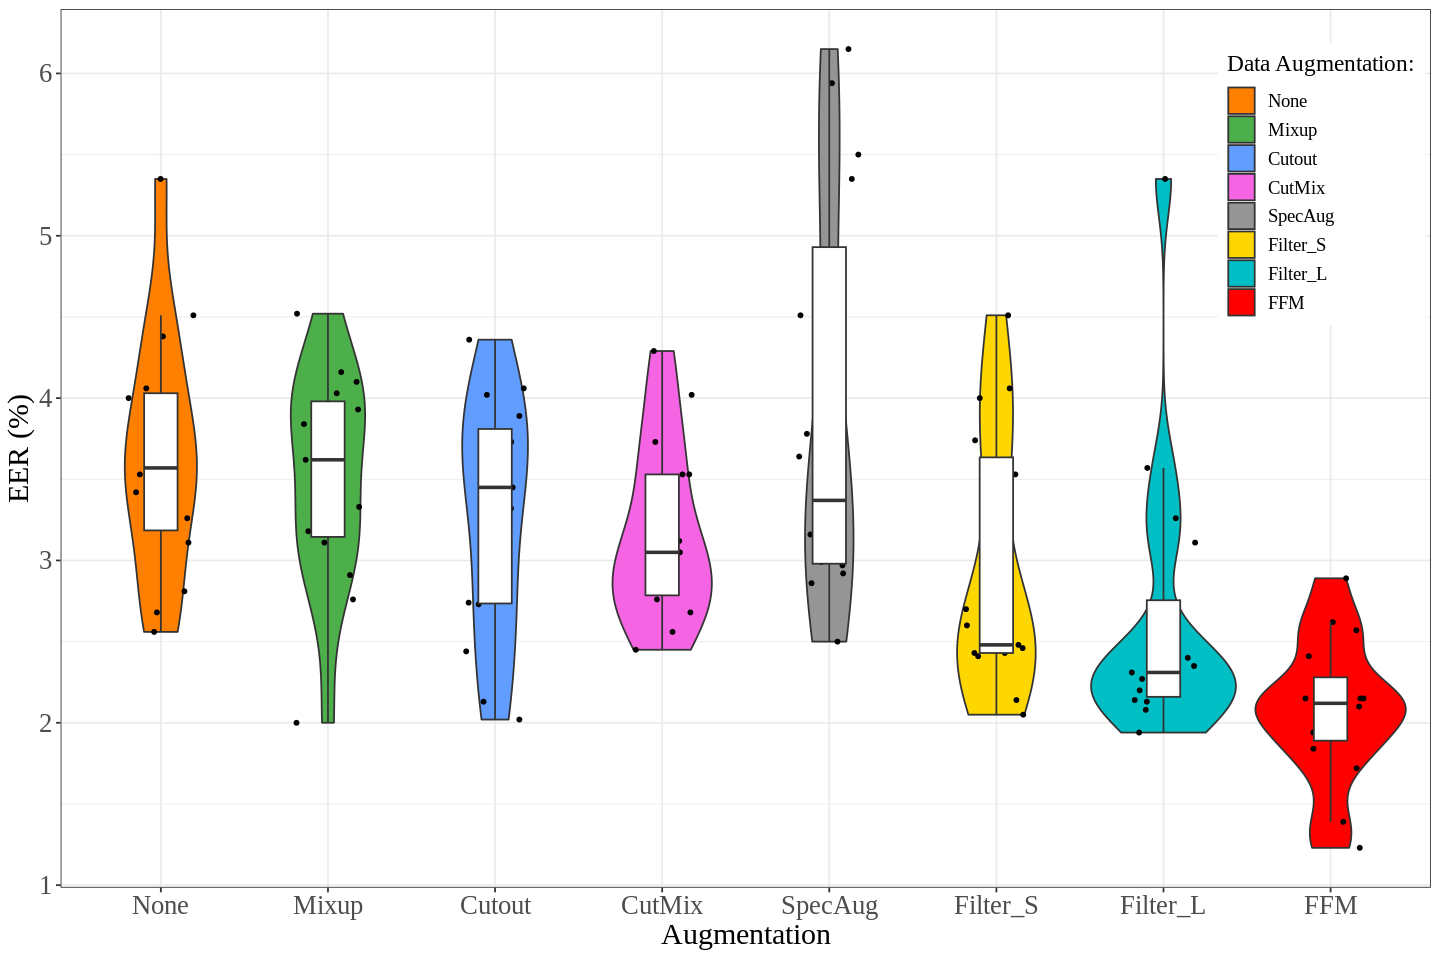

In [ ]:
ggplot(data_asv, aes(x =aug,y=eer_eval, fill=factor(aug))) +
  theme_bw() +
  geom_violin() +

  geom_jitter(width = 0.2, size = 1, color = "black",show.legend = FALSE) +
  geom_boxplot(width = 0.2, fill = "white", outlier.shape = NA) +
  labs(x = "aug", y = "eer_eval", fill = "Data Augmentation:", size=16)  +
  theme(
      text = element_text(size = 14, family = "Times New Roman"),
      axis.title = element_text(size = 18),
      axis.text.x = element_text(size = 16), # 축 제목과 라벨 사이의 간격
      axis.text.y = element_text(size = 16),
      panel.background = element_blank(),
      strip.background = element_blank(),
      legend.position = c(0.92,0.8),
      legend.box = "horizontal"
  )+
     xlab('Augmentation') + ylab('EER (%)') + #+ ggtitle('M+LF, M+LF+RF worked best')
scale_fill_manual(values = c("#FF7F00","#4DAF4A","#619CFF","#F564E3","#959595","gold","#00BFC4","red"),
labels = c("None", "Mixup", "Cutout", "CutMix", "SpecAug", "Filter_S", "Filter_L", "FFM"))
 #scale_fill_brewer(palette="Paired") +



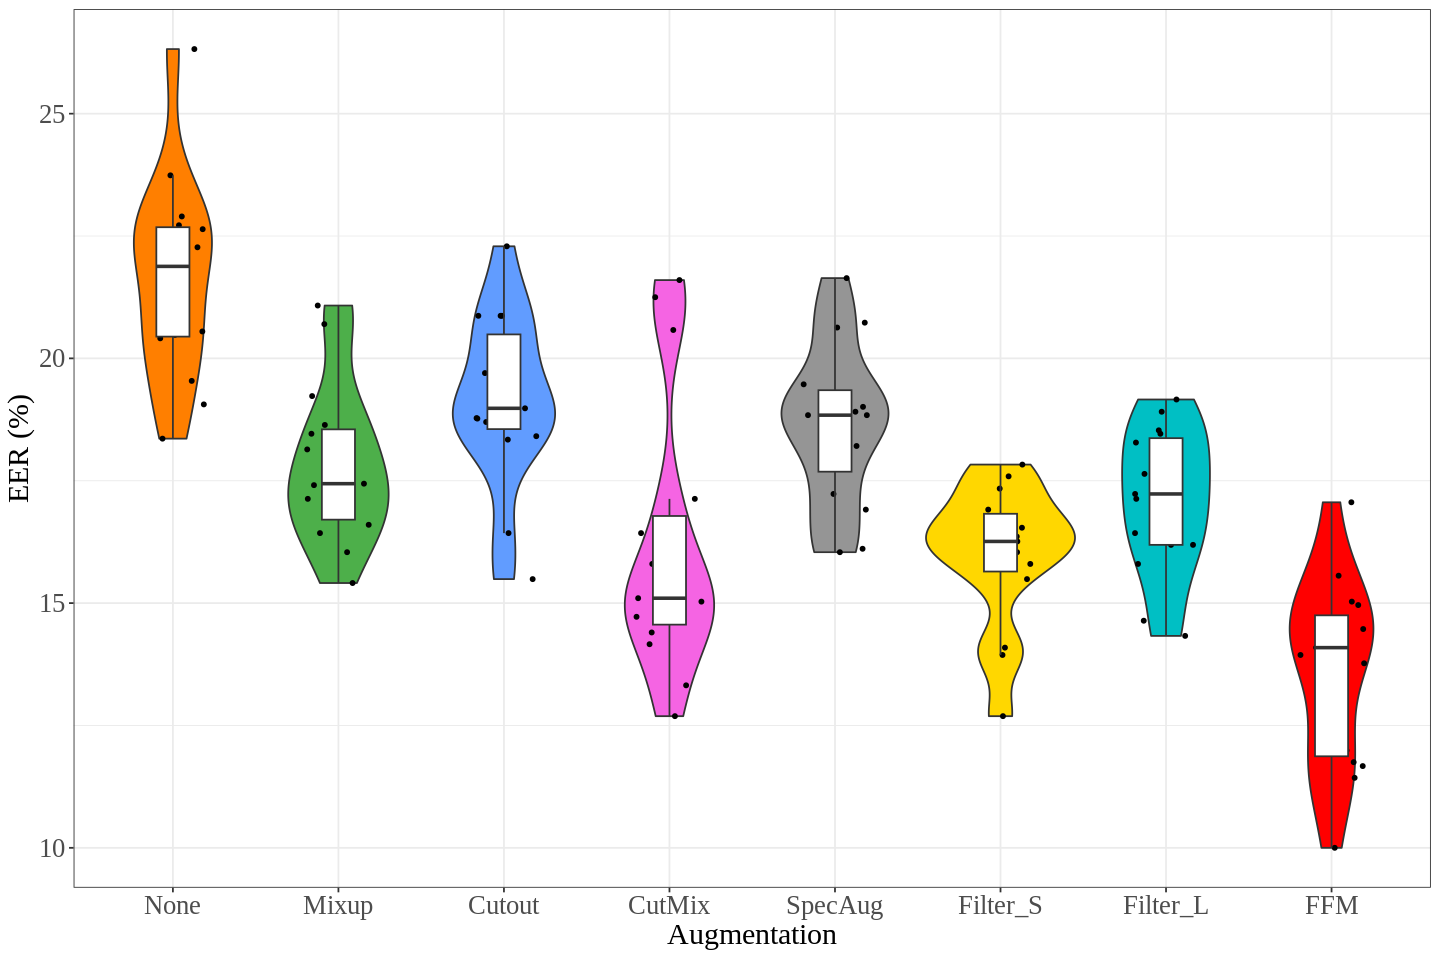

In [ ]:
ggplot(data_filtered, aes(x =aug,y=eer_eval, fill=factor(aug))) +
  theme_bw() +
  geom_violin() +

  geom_jitter(width = 0.2, size = 1, color = "black",show.legend = FALSE) +
  geom_boxplot(width = 0.2, fill = "white", outlier.shape = NA) +
  labs(x = "aug", y = "eer_eval", size=16)  +
  theme(
      text = element_text(size = 14, family = "Times New Roman"),
      axis.title = element_text(size = 18),
      axis.text.x = element_text(size = 16), # 축 제목과 라벨 사이의 간격
      axis.text.y = element_text(size = 16),
      panel.background = element_blank(),
      strip.background = element_blank(),
      legend.position = "none"
  )+
     xlab('Augmentation') + ylab('EER (%)') + #+ ggtitle('M+LF, M+LF+RF worked best')
scale_fill_manual(values = c("#FF7F00","#4DAF4A","#619CFF","#F564E3","#959595","gold","#00BFC4","red"),
labels = c("None", "Mixup", "Cutout", "CutMix", "SpecAug", "Filter_S", "Filter_L", "FFM"))
 #scale_fill_brewer(palette="Paired") +



## 1행 2열로 Data augmentation 비교 실험 결과 시각화

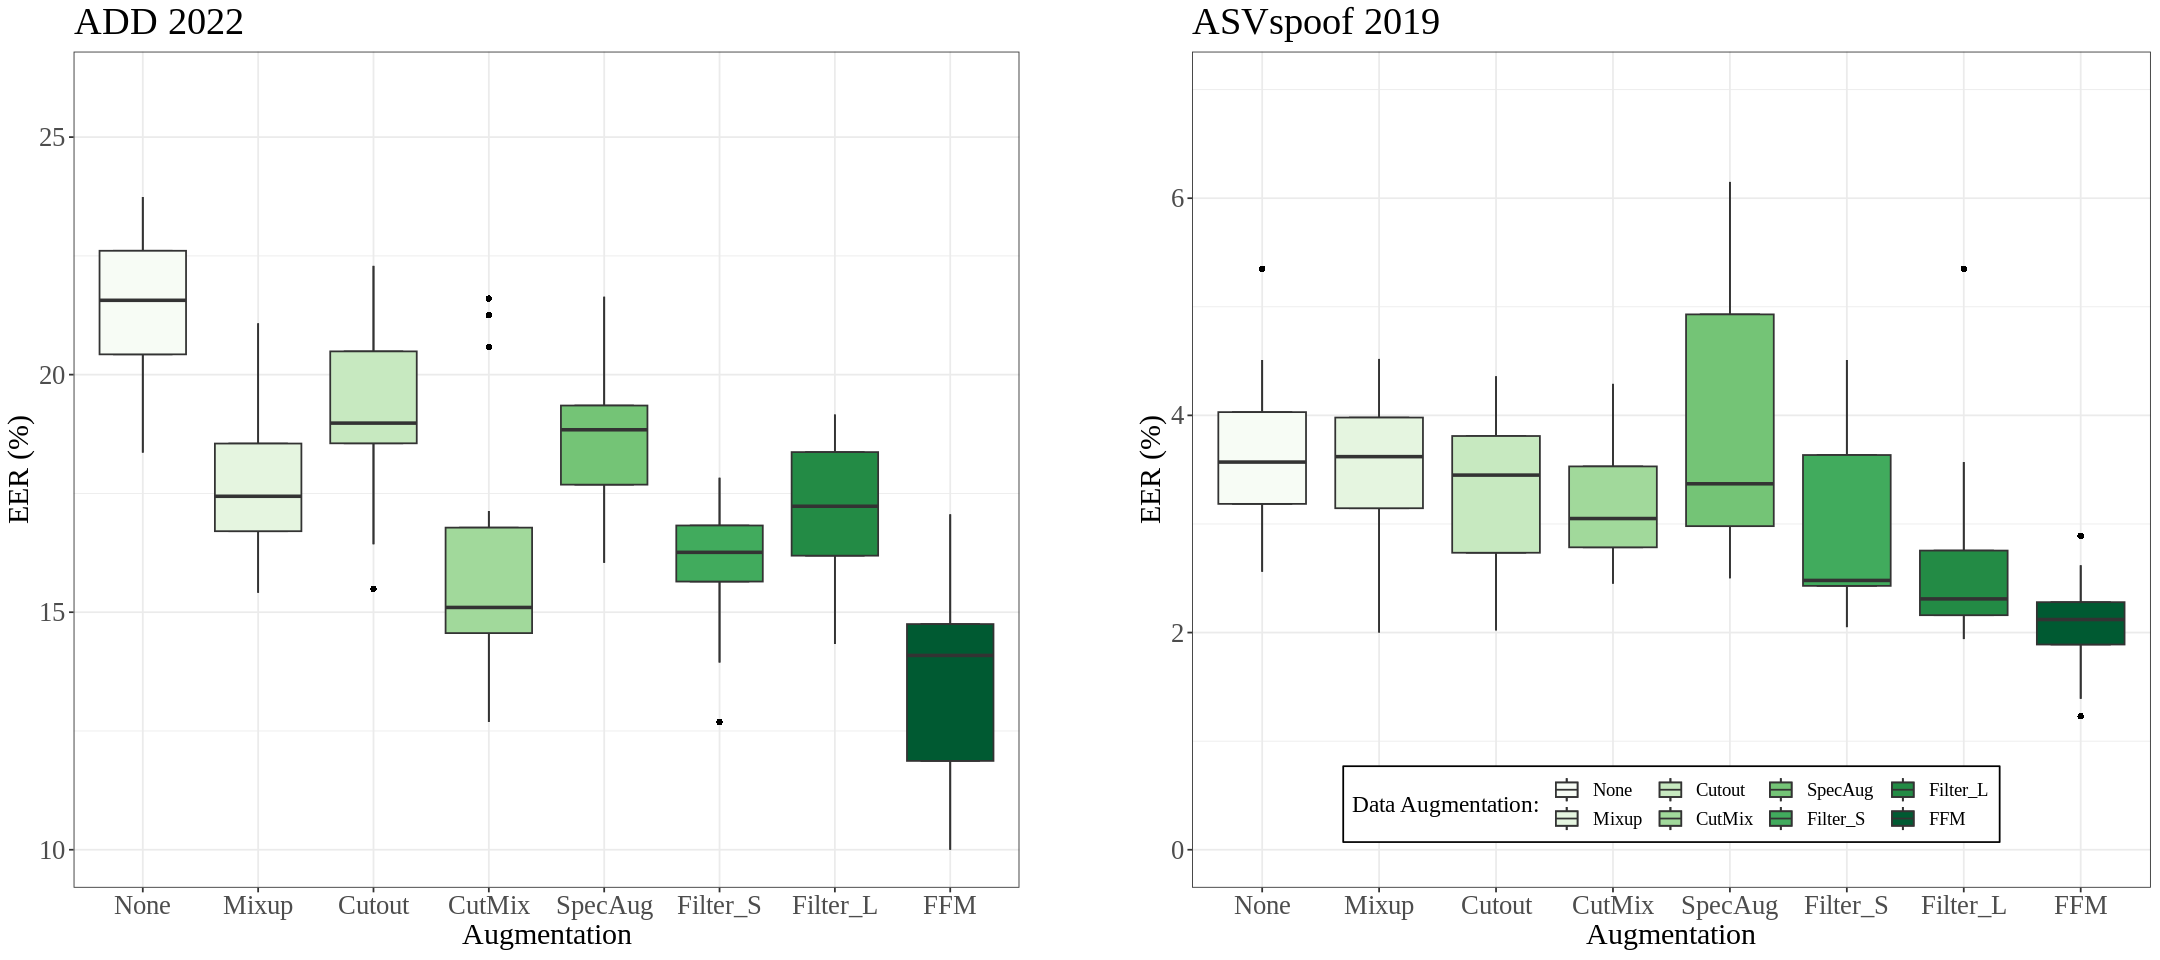

In [ ]:
 suppressWarnings({
  library(gridExtra)
  options(repr.plot.width = 18, repr.plot.height = 8)

  p1 <- ggplot(data_filtered, aes(x = aug, y = eer_eval, fill = factor(aug))) +
    theme_bw() +
    #geom_violin() +
    #geom_jitter(width = 0.2, size = 1, color = "black", show.legend = FALSE) +
    # geom_boxplot(width = 0.2, fill = "white", outlier.shape = NA) +
    geom_boxplot(width = 0.5, outlier.shape = NA, aes(fill = factor(aug))) +
    geom_boxplot(outlier.colour="black", outlier.shape=16) +
    labs(x = "Augmentation", y = "EER (%)") +
    theme(
      text = element_text(size = 14, family = "Times New Roman"),
      axis.title = element_text(size = 18),
      axis.text.x = element_text(size = 16),
      axis.text.y = element_text(size = 16),
      panel.background = element_blank(),
      strip.background = element_blank(),
      legend.position = "none",
      plot.title = element_text(size = 23) # 제목 글씨 크기
    ) +
      ylim(10,26)+
    scale_fill_brewer(palette="Greens") +
    ggtitle('ADD 2022')

  p2 <- ggplot(data_asv, aes(x = aug, y = eer_eval, fill = factor(aug))) +
    theme_bw() +
    # geom_violin() +
    # geom_jitter(width = 0.2, size = 1, color = "black", show.legend = FALSE) +
    # geom_boxplot(width = 0.2, fill = "white", outlier.shape = NA) +
    geom_boxplot(width = 0.5, outlier.shape = NA, aes(fill = factor(aug))) +
    labs(x = "Augmentation", y = "EER (%)", fill = "Data Augmentation:", size=16) +
    geom_boxplot(outlier.colour="black", outlier.shape=16) +
    theme(
      text = element_text(size = 14, family = "Times New Roman"),
      axis.title = element_text(size = 18),
      axis.text.x = element_text(size = 16),
      axis.text.y = element_text(size = 16),
      panel.background = element_blank(),
      strip.background = element_blank(),
      legend.position = c(0.5, 0.1),
      legend.direction  = "horizontal",
      legend.background = element_rect(color = 'black'),
      plot.title = element_text(size = 23) # 제목 글씨 크기
    ) +
      ylim(0,7)+
    scale_fill_brewer(palette="Greens") +
    ggtitle('ASVspoof 2019')

  img <- grid.arrange(p1, NULL, p2, ncol = 3, widths = c(1, 0.1, 1))


ggsave(file = "DA_all_boxplot.png", plot = img, dpi = 300, width = 18, height = 8)




})


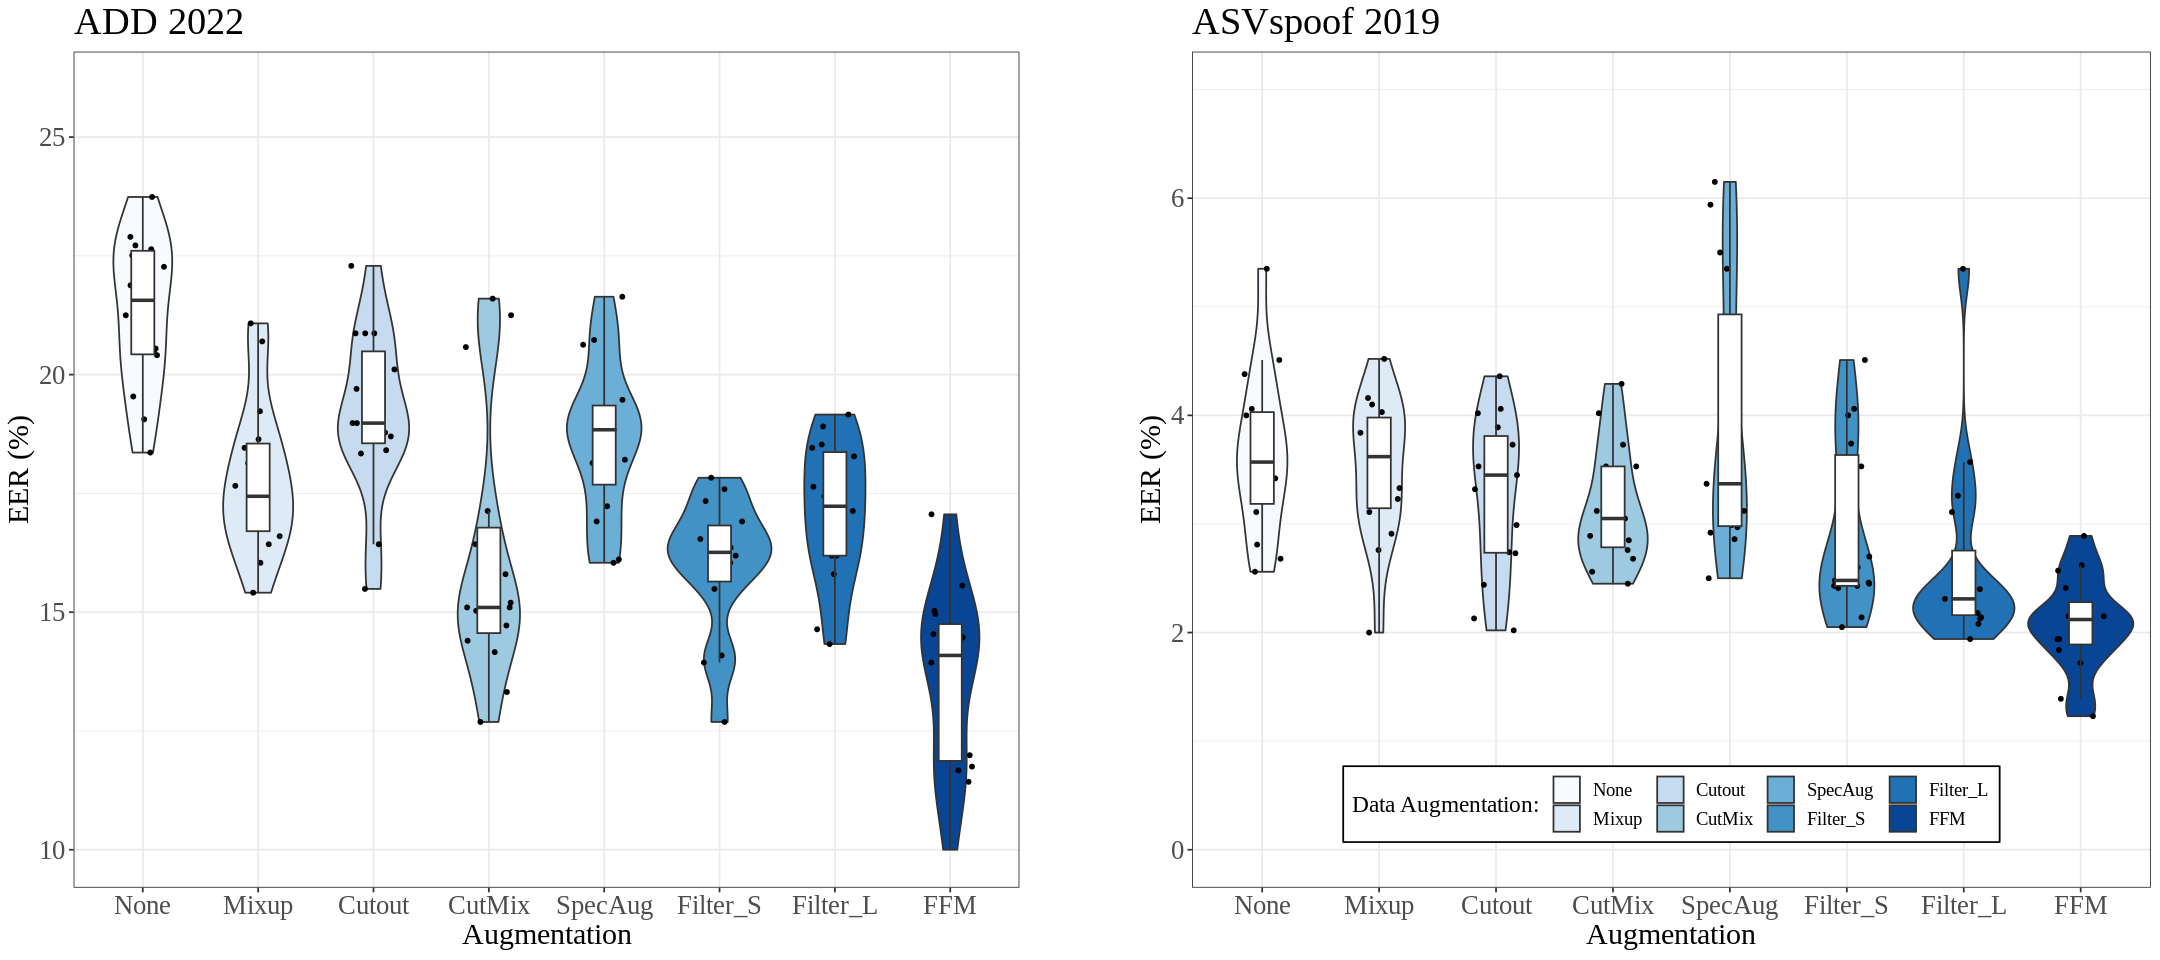

In [ ]:
 suppressWarnings({
  library(gridExtra)
  options(repr.plot.width = 18, repr.plot.height = 8)

  p1 <- ggplot(data_filtered, aes(x = aug, y = eer_eval, fill = factor(aug))) +
    theme_bw() +
    geom_violin() +
    geom_jitter(width = 0.2, size = 1, color = "black", show.legend = FALSE) +
    geom_boxplot(width = 0.2, fill = "white", outlier.shape = NA) +
    labs(x = "Augmentation", y = "EER (%)") +
    theme(
      text = element_text(size = 14, family = "Times New Roman"),
      axis.title = element_text(size = 18),
      axis.text.x = element_text(size = 16),
      axis.text.y = element_text(size = 16),
      panel.background = element_blank(),
      strip.background = element_blank(),
      legend.position = "none",
      plot.title = element_text(size = 23) # 제목 글씨 크기
    ) +
      ylim(10,26)+
    scale_fill_brewer(palette="Blues") +
    ggtitle('ADD 2022')

  p2 <- ggplot(data_asv, aes(x = aug, y = eer_eval, fill = factor(aug))) +
    theme_bw() +
    geom_violin() +
    geom_jitter(width = 0.2, size = 1, color = "black", show.legend = FALSE) +
    geom_boxplot(width = 0.2, fill = "white", outlier.shape = NA) +
    labs(x = "Augmentation", y = "EER (%)", fill = "Data Augmentation:", size=16) +
    theme(
      text = element_text(size = 14, family = "Times New Roman"),
      axis.title = element_text(size = 18),
      axis.text.x = element_text(size = 16),
      axis.text.y = element_text(size = 16),
      panel.background = element_blank(),
      strip.background = element_blank(),
      legend.position = c(0.5, 0.1),
      legend.direction  = "horizontal",
      legend.background = element_rect(color = 'black'),
      plot.title = element_text(size = 23) # 제목 글씨 크기
    ) +
      ylim(0,7)+
    scale_fill_brewer(palette="Blues") +
    ggtitle('ASVspoof 2019')

  img <- grid.arrange(p1, NULL, p2, ncol = 3, widths = c(1, 0.1, 1))


ggsave(file = "DA_all_blue.png", plot = img, dpi = 300, width = 18, height = 8)




})


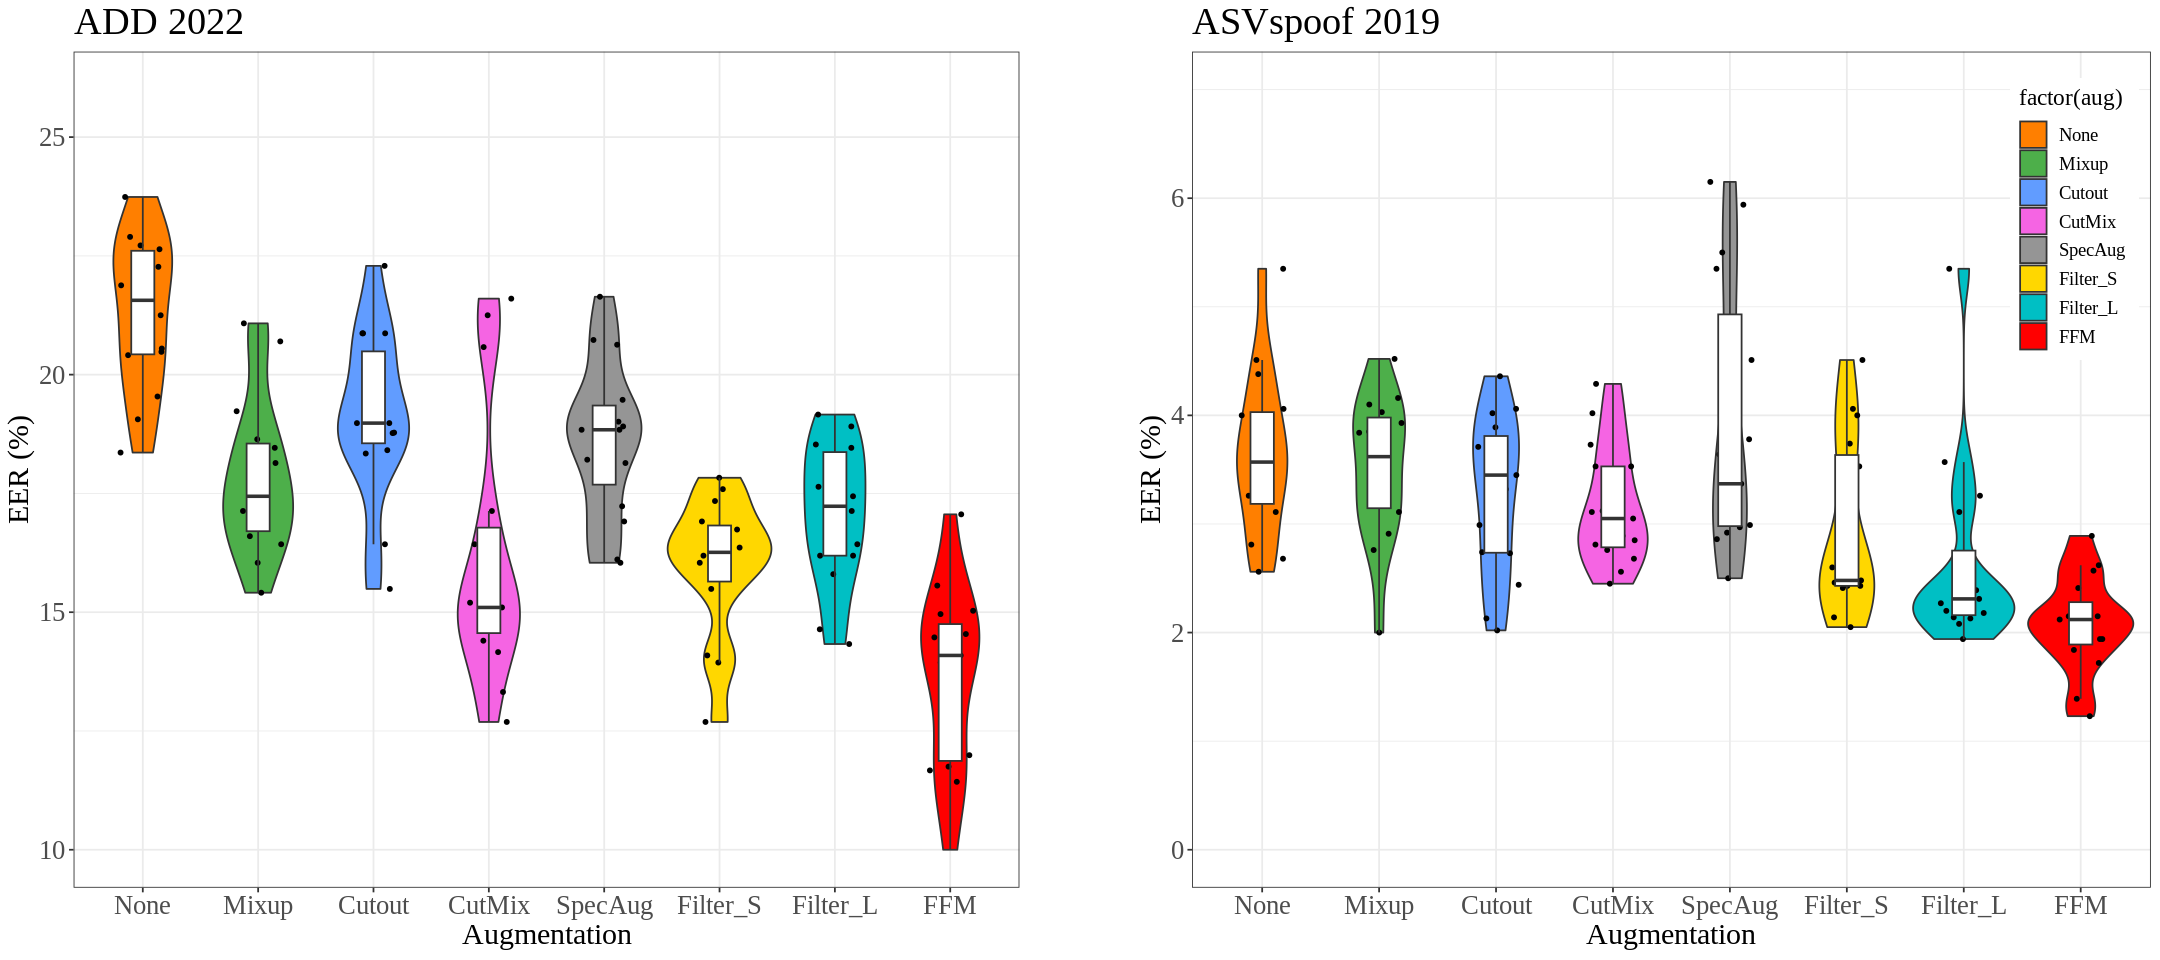

In [ ]:
suppressWarnings({
  library(gridExtra)
  options(repr.plot.width = 18, repr.plot.height = 8)

  p1 <- ggplot(data_filtered, aes(x = aug, y = eer_eval, fill = factor(aug))) +
    theme_bw() +
    geom_violin() +
    geom_jitter(width = 0.2, size = 1, color = "black", show.legend = FALSE) +
    geom_boxplot(width = 0.2, fill = "white", outlier.shape = NA) +
    labs(x = "Augmentation", y = "EER (%)") +
    theme(
      text = element_text(size = 14, family = "Times New Roman"),
      axis.title = element_text(size = 18),
      axis.text.x = element_text(size = 16),
      axis.text.y = element_text(size = 16),
      panel.background = element_blank(),
      strip.background = element_blank(),
      legend.position = "none",
      plot.title = element_text(size = 23) # 제목 글씨 크기
    ) +
      ylim(10,26)+
    scale_fill_manual(values = c("#FF7F00","#4DAF4A","#619CFF","#F564E3","#959595","gold","#00BFC4","red"),
                      labels = c("None", "Mixup", "Cutout", "CutMix", "SpecAug", "Filter_S", "Filter_L", "FFM")) +
    ggtitle('ADD 2022')

  p2 <- ggplot(data_asv, aes(x = aug, y = eer_eval, fill = factor(aug))) +
    theme_bw() +
    geom_violin() +
    geom_jitter(width = 0.2, size = 1, color = "black", show.legend = FALSE) +
    geom_boxplot(width = 0.2, fill = "white", outlier.shape = NA) +
    labs(x = "Augmentation", y = "EER (%)") +
    theme(
      text = element_text(size = 14, family = "Times New Roman"),
      axis.title = element_text(size = 18),
      axis.text.x = element_text(size = 16),
      axis.text.y = element_text(size = 16),
      panel.background = element_blank(),
      strip.background = element_blank(),
      legend.position = c(0.92, 0.8),
      legend.box = "horizontal",
      plot.title = element_text(size = 23) # 제목 글씨 크기
    ) +
      ylim(0,7)+
    scale_fill_manual(values = c("#FF7F00","#4DAF4A","#619CFF","#F564E3","#959595","gold","#00BFC4","red"),
                      labels = c("None", "Mixup", "Cutout", "CutMix", "SpecAug", "Filter_S", "Filter_L", "FFM")) +
    ggtitle('ASVspoof 2019')

  img <- grid.arrange(p1, NULL, p2, ncol = 3, widths = c(1, 0.1, 1))


ggsave(file = "DA_all.png", plot = img, dpi = 300, width = 18, height = 8)


})


## wilcox test

In [ ]:
base_asv = data_asv %>% filter(aug == "None") %>% select(eer_eval)
mixup_asv = data_asv %>% filter(aug == "Mixup") %>% select(eer_eval)
cutout_asv = data_asv %>% filter(aug == "Cutout") %>% select(eer_eval)
cutmix_asv = data_asv %>% filter(aug == "CutMix") %>% select(eer_eval)
specaug_asv = data_asv %>% filter(aug == "SpecAug") %>% select(eer_eval)
filter_step_asv = data_asv %>% filter(aug == "Filter_S") %>% select(eer_eval)
filter_linear_asv = data_asv %>% filter(aug == "Filter_L") %>% select(eer_eval)
ffm_asv = data_asv %>% filter(aug == "FFM") %>% select(eer_eval)



In [ ]:
# 1. FFM vs base
wilcox.test(base_asv$eer_eval, ffm_asv$eer_eval, "greater")

Warning message in wilcox.test.default(base_asv$eer_eval, ffm_asv$eer_eval, "greater"):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  base_asv$eer_eval and ffm_asv$eer_eval
W = 220, p-value = 4.485e-06
alternative hypothesis: true location shift is greater than 0


In [ ]:
p_value <- wilcox.test(base_asv$eer_eval, ffm_asv$eer_eval, "greater")$p.value

# 본페로니 보정
cat(paste("검정: ", adjusted_alpha > p_value, "\n"))

Warning message in wilcox.test.default(base_asv$eer_eval, ffm_asv$eer_eval, "greater"):
“cannot compute exact p-value with ties”


검정:  TRUE 


In [ ]:
# 2. FFM vs Mixup
wilcox.test(mixup_asv$eer_eval, ffm_asv$eer_eval, "greater")

Warning message in wilcox.test.default(mixup_asv$eer_eval, ffm_asv$eer_eval, "greater"):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  mixup_asv$eer_eval and ffm_asv$eer_eval
W = 215, p-value = 1.152e-05
alternative hypothesis: true location shift is greater than 0


In [ ]:
p_value <- wilcox.test(mixup_asv$eer_eval, ffm_asv$eer_eval, "greater")$p.value

# 본페로니 보정
cat(paste("검정: ", adjusted_alpha > p_value, "\n"))

Warning message in wilcox.test.default(mixup_asv$eer_eval, ffm_asv$eer_eval, "greater"):
“cannot compute exact p-value with ties”


검정:  TRUE 


In [ ]:
# 3. FFM vs Cutout
wilcox.test(cutout_asv$eer_eval, ffm_asv$eer_eval, "greater")

Warning message in wilcox.test.default(cutout_asv$eer_eval, ffm_asv$eer_eval, "greater"):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  cutout_asv$eer_eval and ffm_asv$eer_eval
W = 204, p-value = 7.949e-05
alternative hypothesis: true location shift is greater than 0


In [ ]:
p_value <- wilcox.test(cutout_asv$eer_eval, ffm_asv$eer_eval, "greater")$p.value

# 본페로니 보정
cat(paste("검정: ", adjusted_alpha > p_value, "\n"))

Warning message in wilcox.test.default(cutout_asv$eer_eval, ffm_asv$eer_eval, "greater"):
“cannot compute exact p-value with ties”


검정:  TRUE 


In [ ]:
# 4. FFM vs CutMix
wilcox.test(cutmix_asv$eer_eval, ffm_asv$eer_eval, "greater")

Warning message in wilcox.test.default(cutmix_asv$eer_eval, ffm_asv$eer_eval, "greater"):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  cutmix_asv$eer_eval and ffm_asv$eer_eval
W = 214, p-value = 1.382e-05
alternative hypothesis: true location shift is greater than 0


In [ ]:
p_value <- wilcox.test(cutmix_asv$eer_eval, ffm_asv$eer_eval, "greater")$p.value

# 본페로니 보정
cat(paste("검정: ", adjusted_alpha > p_value, "\n"))

Warning message in wilcox.test.default(cutmix_asv$eer_eval, ffm_asv$eer_eval, "greater"):
“cannot compute exact p-value with ties”


검정:  TRUE 


In [ ]:
# 5. FFM vs SpecAugment
wilcox.test(specaug_asv$eer_eval, ffm_asv$eer_eval, "greater")

Warning message in wilcox.test.default(specaug_asv$eer_eval, ffm_asv$eer_eval, "greater"):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  specaug_asv$eer_eval and ffm_asv$eer_eval
W = 221, p-value = 3.695e-06
alternative hypothesis: true location shift is greater than 0


In [ ]:
p_value <- wilcox.test(specaug_asv$eer_eval, ffm_asv$eer_eval, "greater")$p.value

# 본페로니 보정
cat(paste("검정: ", adjusted_alpha > p_value, "\n"))

Warning message in wilcox.test.default(specaug_asv$eer_eval, ffm_asv$eer_eval, "greater"):
“cannot compute exact p-value with ties”


검정:  TRUE 


In [ ]:
# 6. FFM vs FilterAugment-step
wilcox.test(filter_step_asv$eer_eval, ffm_asv$eer_eval, "greater")

Warning message in wilcox.test.default(filter_step_asv$eer_eval, ffm_asv$eer_eval, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  filter_step_asv$eer_eval and ffm_asv$eer_eval
W = 187.5, p-value = 0.0009923
alternative hypothesis: true location shift is greater than 0


In [ ]:
p_value <- wilcox.test(filter_step_asv$eer_eval, ffm_asv$eer_eval, "greater")$p.value

# 본페로니 보정
cat(paste("검정: ", adjusted_alpha > p_value, "\n"))

Warning message in wilcox.test.default(filter_step_asv$eer_eval, ffm_asv$eer_eval, :
“cannot compute exact p-value with ties”


검정:  TRUE 


In [ ]:
# 7. FFM vs FilterAugment-linear
wilcox.test(filter_linear_asv$eer_eval, ffm_asv$eer_eval, "greater")

Warning message in wilcox.test.default(filter_linear_asv$eer_eval, ffm_asv$eer_eval, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  filter_linear_asv$eer_eval and ffm_asv$eer_eval
W = 164, p-value = 0.01712
alternative hypothesis: true location shift is greater than 0


In [ ]:
p_value <- wilcox.test(filter_linear_asv$eer_eval, ffm_asv$eer_eval, "greater")$p.value

# 본페로니 보정
cat(paste("검정: ", adjusted_alpha > p_value, "\n"))

Warning message in wilcox.test.default(filter_linear_asv$eer_eval, ffm_asv$eer_eval, :
“cannot compute exact p-value with ties”


검정:  FALSE 


# FFM - 3번 실행 결과

In [ ]:
suppressWarnings({system("gdown --id 1Y_B1-lHvYFA0sH4C_JY69tzrnWaR3rch")
add_ffm = read_excel("최종_Results_FFM_ADD.xlsx")
})

In [ ]:
head(add_ffm)

aug,model,beta_param,lowpass,highpass,ranfilter2,mask,blur
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
no_aug,BCResMax_ADD_,0.0,FALSE,FALSE,FALSE,22.64,NA
no_aug,BCResMax_ADD_,0.0,FALSE,FALSE,FALSE,23.74,NA
no_aug,BCResMax_ADD_,0.0,FALSE,FALSE,FALSE,20.55,NA
"Mixup, RF",BCResMax_ADD_,0.7,FALSE,FALSE,"[2, [8, 9, 10, 11, 12]]",22.90,15.03
"Mixup, RF",BCResMax_ADD_,0.7,FALSE,FALSE,"[2, [8, 9, 10, 11, 12]]",18.36,13.56
"Mixup, RF",BCResMax_ADD_,0.7,FALSE,FALSE,"[2, [8, 9, 10, 11, 12]]",26.32,11.36


In [ ]:
add_ffm   %>%
  group_by(aug) %>% summarize(m_EER = mean(mask))

aug,m_EER
<chr>,<dbl>
"Mixup, HF",18.38333
"Mixup, HF, RF",16.36867
"Mixup, LF",16.40267
"Mixup, LF, HF",17.93400
"Mixup, LF, HF, RF",16.74467
"Mixup, LF, RF",15.59733
"Mixup, RF",17.33867
mixup,17.94933
no_aug,21.64200


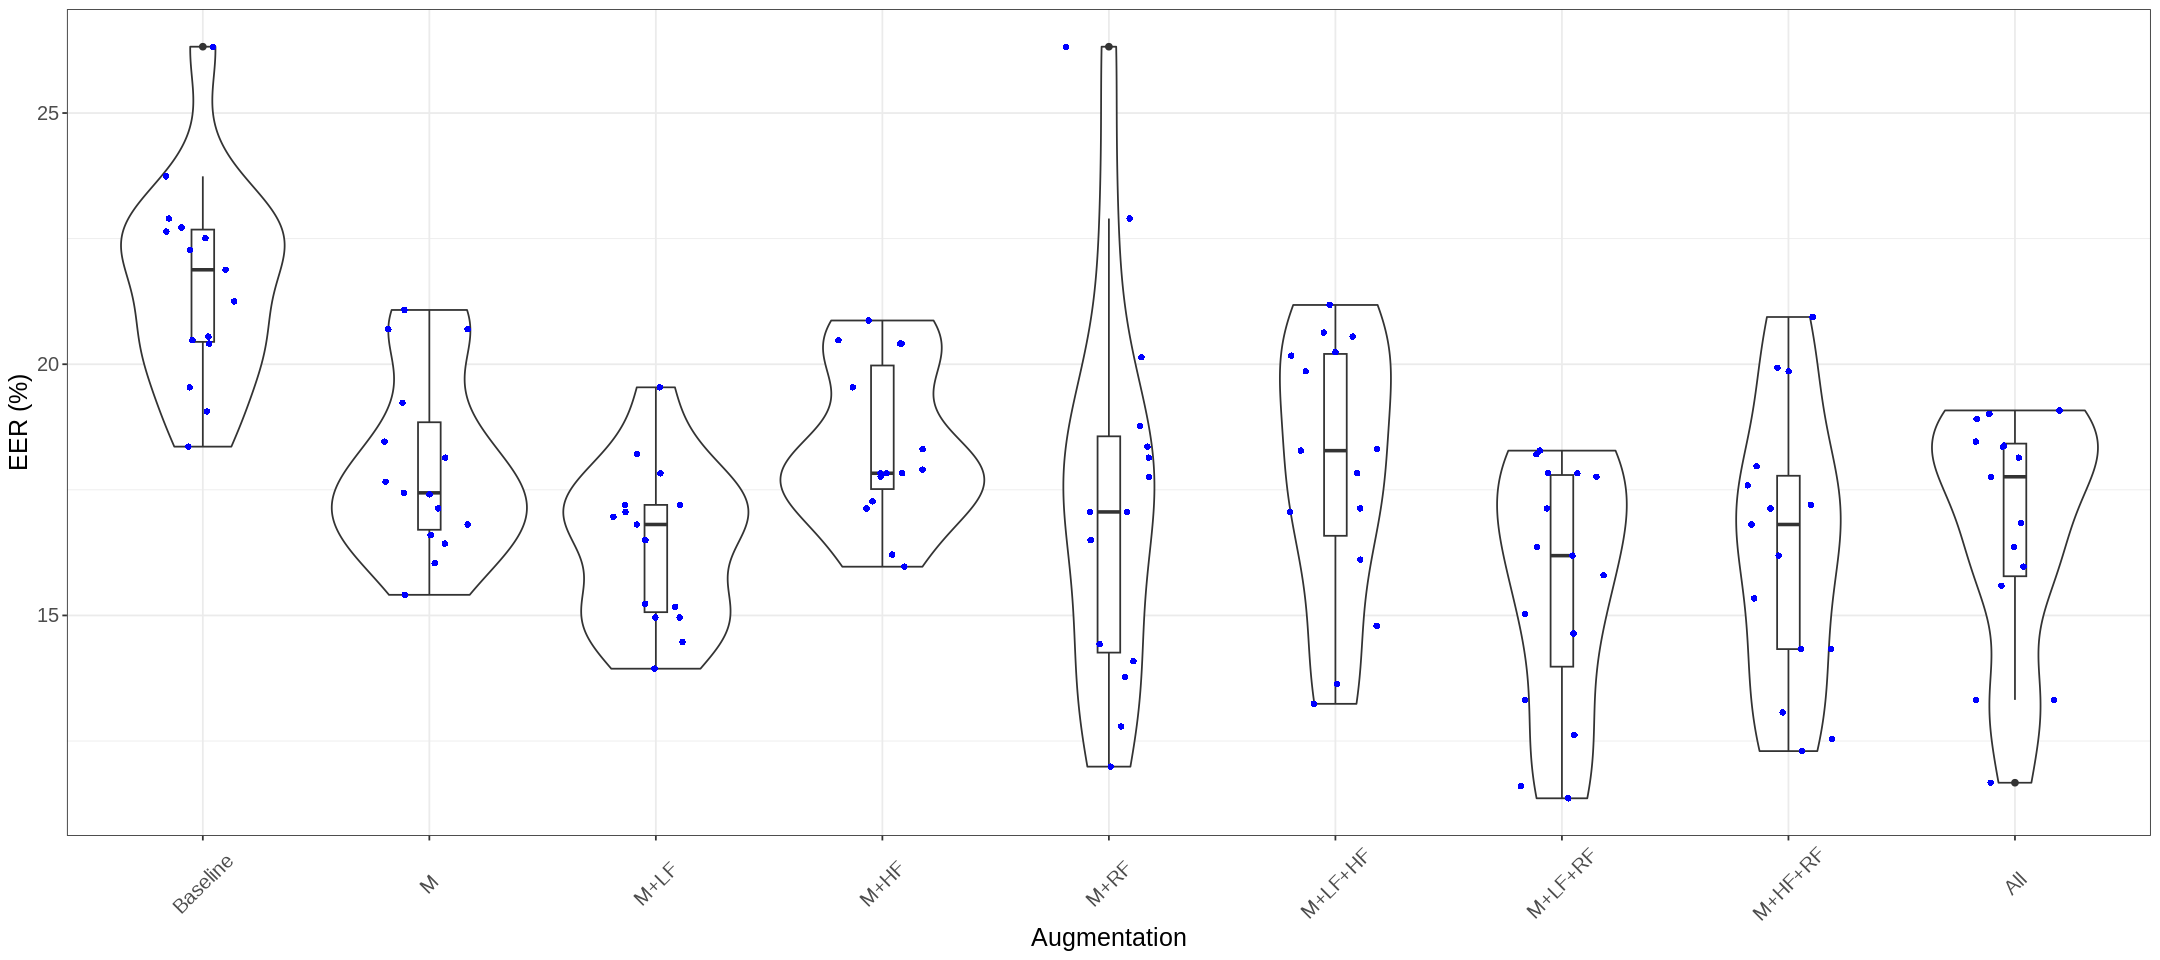

In [ ]:
add_ffm %>%
   ggplot(aes(x = factor(aug, levels = c( "no_aug","mixup","Mixup, LF", "Mixup, HF", "Mixup, RF", "Mixup, LF, HF", "Mixup, LF, RF", "Mixup, HF, RF", "Mixup, LF, HF, RF" ), labels = c("Baseline", "M", "M+LF", "M+HF", "M+RF", "M+LF+HF", "M+LF+RF", "M+HF+RF", "All" )) ,y=mask)) + theme_bw() + geom_violin() +
    geom_boxplot(width=0.1)+ geom_jitter(shape=16, position=position_jitter(0.2), color = "blue")+
  theme(axis.line = element_blank(),
#          panel.grid.major = element_blank(),
          panel.background = element_blank(),
          strip.background = element_blank(),
          axis.text.x = element_text(angle= 45, vjust = .5)
#          axis.text.y = element_blank()
  )+
    theme(legend.position = "right", text = element_text(size = 15), plot.title = element_text(hjust = 0.5, size = 20) ) +
        xlab('Augmentation') + ylab('EER (%)') #+ ggtitle('M+LF, M+LF+RF worked best')

## ASV 2019

In [ ]:
asv = read.csv("sample_data/EER_ASV(mask, blur).csv")

In [ ]:
asv = read.csv("sample_data/EER_ASV(mask, blur).csv")

In [ ]:
asv   %>%
  group_by(aug) %>% summarize(m_EER = mean(mask))

In [ ]:
asv %>%
   ggplot(aes(x = factor(aug, levels = c( "Mixup, LF", "Mixup, HF", "Mixup, RF", "Mixup, LF, HF", "Mixup, LF, RF", "Mixup, HF, RF", "Mixup, LF, HF, RF" ), labels = c("M+LF", "M+HF", "M+RF", "M+LF+HF", "M+LF+RF", "M+HF+RF", "All" )) ,y=mask)) + theme_bw() + geom_violin() +
    geom_boxplot(width=0.1)+ geom_jitter(shape=16, position=position_jitter(0.2), color = "blue")+
  theme(axis.line = element_blank(),
#          panel.grid.major = element_blank(),
          panel.background = element_blank(),
          strip.background = element_blank(),
          axis.text.x = element_text(angle= 45, vjust = .5)
#          axis.text.y = element_blank()
  )+
    theme(legend.position = "right", text = element_text(size = 15), plot.title = element_text(hjust = 0.5, size = 20) ) +
        xlab('Augmentation') + ylab('EER (%)') #+ ggtitle('M+LF, M+LF+RF worked best')

# FFM - 평균값

In [ ]:
exp2

In [ ]:
(newd = exp2 %>% pivot_longer(3:7, names_to = "model", values_to = "EER"))

In [ ]:
newd   %>%
  group_by(Data, Aug_ID) %>% summarize(m_EER = mean(EER))

## ADD 2022

In [ ]:
newd %>% filter(Data == "ADD") %>%
   ggplot(aes(x = factor(Aug_ID, levels = c("Baseline", "Mixup", "1", "2", "3", "4", "5", "6", "7" ), labels = c("Baseline", "Mixup", "M+LF", "M+HF", "M+RF", "M+LF+HF", "M+LF+RF", "M+HF+RF", "All" )) ,y=EER)) + theme_bw() + geom_violin() +
    geom_boxplot(width=0.1)+ geom_jitter(shape=16, position=position_jitter(0.2), color = "grey")+
  theme(axis.line = element_blank(),
#          panel.grid.major = element_blank(),
          panel.background = element_blank(),
          strip.background = element_blank(),
          axis.text.x = element_text(angle= 45, vjust = .5)
#          axis.text.y = element_blank()
  )+
    theme(legend.position = "right", text = element_text(size = 15), plot.title = element_text(hjust = 0.5, size = 20) ) +
        xlab('Augmentation') + ylab('EER (%)') #+ ggtitle('M+LF, M+LF+RF worked best')

In [ ]:
b1_add = newd %>% filter(Data == "ADD" & Aug_ID == "Baseline") %>% select(EER)
mixup1_add = newd %>% filter(Data == "ADD" & Aug_ID == "Mixup") %>% select(EER)
m3_add = newd %>% filter(Data == "ADD" & Aug_ID %in% c("3") ) %>% select(EER)
fmm_add = newd %>% filter(Data == "ADD" & Aug_ID %in% c("1","2","3","4","5","6","7") ) %>% select(EER)

In [ ]:
wilcox.test(b1_add$EER, mixup1_add$EER, "greater")

In [ ]:
wilcox.test(mixup1_add$EER, m3_add$EER, "greater")

## ASV 2019

In [ ]:
newd %>% filter(Data == "ASV") %>%
   ggplot(aes(x = factor(Aug_ID, levels = c("Baseline", "Mixup", "1", "2", "3", "4", "5", "6", "7" ), labels = c("Baseline", "Mixup", "M+LF", "M+HF", "M+RF", "M+LF+HF", "M+LF+RF", "M+HF+RF", "All" )) ,y=EER)) + theme_bw() + #geom_violin() +
    geom_boxplot(width=0.7)+ geom_jitter(shape=16, position=position_jitter(0.2), color = "grey")+
  theme(axis.line = element_blank(),
#          panel.grid.major = element_blank(),
          panel.background = element_blank(),
          strip.background = element_blank(),
          axis.text.x = element_text(angle= 45, vjust = .5)
#          axis.text.y = element_blank()
  )+
    theme(legend.position = "right", text = element_text(size = 15), plot.title = element_text(hjust = 0.5, size = 20) ) +
        xlab('Augmentation') + ylab('EER (%)') #+ ggtitle('M+LF, M+LF+RF worked best')

In [ ]:
## Num macaron layers
b1_asv = newd %>% filter(Data == "ASV" & Aug_ID == "Baseline") %>% select(EER)
mixup1_asv = newd %>% filter(Data == "ASV" & Aug_ID == "Mixup") %>% select(EER)
m2_asv = newd %>% filter(Data == "ASV" & Aug_ID == "2") %>% select(EER)
m4_asv = newd %>% filter(Data == "ASV" & Aug_ID == "4") %>% select(EER)

In [ ]:
wilcox.test(b1_asv$EER, m2_asv$EER, "greater")

In [ ]:
wilcox.test(mixup1_asv$EER, m4_asv$EER, "greater")

# Data Aug - 3번 실행 결과

# Data Aug - 평균값

In [ ]:
library(tidyverse)
library(readxl)

In [ ]:
xlsx : https://docs.google.com/spreadsheets/d/1pu-RUzC5li5ee8W6yI-qL2C-xfAEpfDp/edit?usp=drive_link&ouid=101818153396750477262&rtpof=true&sd=true
csv : https://drive.google.com/file/d/1o56vxSanaah_X-9TuPIpNia2dgiSkoTD/view?usp=drive_link

## add 2022

In [ ]:
add = read_excel("최종_Results_DA_ADD.xlsx")
head(add)

In [ ]:
add[add$aug==c("mixup_04", "mixup_05", "mixup_06"),]

In [ ]:
# 그룹별 평균 확인

result <- aggregate(eer_eval ~ aug, add, FUN = mean)
print(result)

In [ ]:
# add ffm 평균 확인
add_ffm   %>%
  group_by(aug) %>% summarize(m_EER = mean(mask))

In [ ]:
add %>% select(aug) %>% unique()

In [ ]:
add %>% select(model) %>% unique()

In [ ]:
add %>%
   ggplot(aes(x = factor(aug, levels = c("no_aug", "mixup", "mixup_04","mixup_05" ,"mixup_06","cutout", "cutmix", "specaug", "filter_step", "filter_linear", "FFM" )) ,y=eer_eval)) + theme_bw() + #geom_violin() +
    geom_boxplot(width=0.7)+ geom_jitter(shape=16, position=position_jitter(0.2), color = "grey")+
  theme(axis.line = element_blank(),
#          panel.grid.major = element_blank(),
          panel.background = element_blank(),
          strip.background = element_blank(),
          axis.text.x = element_text(angle= 45, vjust = .5)
#          axis.text.y = element_blank()
  ) +
    theme(legend.position = "right", text = element_text(size = 15), plot.title = element_text(hjust = 0.5, size = 20) ) +
        xlab('Augmentation') + ylab('EER (%)') #+ ggtitle('M+LF, M+LF+RF worked best')

In [ ]:
base_add = add %>% filter(aug == "no_aug") %>% select(eer_eval)
mixup_add = add %>% filter(aug == "mixup") %>% select(eer_eval)
cutout_add = add %>% filter(aug == "cutout") %>% select(eer_eval)
cutmix_add = add %>% filter(aug == "cutmix") %>% select(eer_eval)
specaug_add = add %>% filter(aug == "specaug") %>% select(eer_eval)
filter_step_add = add %>% filter(aug == "filter_step") %>% select(eer_eval)
filter_linear_add = add %>% filter(aug == "filter_linear") %>% select(eer_eval)
fmm_add = add %>% filter(aug == "FFM") %>% select(eer_eval)

In [ ]:
# 1. FFM vs base
wilcox.test(base_add$eer_eval, fmm_add$eer_eval, "greater")

In [ ]:
# 2. FFM vs Mixup
wilcox.test(mixup_add$eer_eval, fmm_add$eer_eval, "greater")

In [ ]:
# 3. FFM vs Cutout
wilcox.test(cutout_add$eer_eval, fmm_add$eer_eval, "greater")

In [ ]:
# 4. FFM vs CutMix
wilcox.test(cutmix_add$eer_eval, fmm_add$eer_eval, "greater")

In [ ]:
# 5. FFM vs SpecAugment
wilcox.test(specaug_add$eer_eval, fmm_add$eer_eval, "greater")

In [ ]:
# 6. FFM vs FilterAugment-step
wilcox.test(filter_step_add$eer_eval, fmm_add$eer_eval, "greater")

In [ ]:
# 7. FFM vs FilterAugment-linear
wilcox.test(filter_linear_add$eer_eval, fmm_add$eer_eval, "greater")

## ASV2019

In [ ]:
asv = read_excel("최종_Results_DA_ASV.xlsx")

In [ ]:
head(asv)

In [ ]:
asv %>%
   ggplot(aes(x = factor(aug, levels = c("no_aug", "mixup", "cutout", "cutmix", "specaug", "filter_step", "filter_linear", "FFM" )) ,y=eer_eval)) + theme_bw() + #geom_violin() +
    geom_boxplot(width=0.7)+ geom_jitter(shape=16, position=position_jitter(0.2), color = "grey")+
  theme(axis.line = element_blank(),
#          panel.grid.major = element_blank(),
          panel.background = element_blank(),
          strip.background = element_blank(),
          axis.text.x = element_text(angle= 45, vjust = .5)
#          axis.text.y = element_blank()
  ) +
    theme(legend.position = "right", text = element_text(size = 15), plot.title = element_text(hjust = 0.5, size = 20) ) +
        xlab('Augmentation') + ylab('EER (%)') #+ ggtitle('M+LF, M+LF+RF worked best')

In [ ]:
base_asv = asv %>% filter(aug == "no_aug") %>% select(eer_eval)
mixup_asv = asv %>% filter(aug == "mixup") %>% select(eer_eval)
cutout_asv = asv %>% filter(aug == "cutout") %>% select(eer_eval)
cutmix_asv = asv %>% filter(aug == "cutmix") %>% select(eer_eval)
specaug_asv = asv %>% filter(aug == "specaug") %>% select(eer_eval)
filter_step_asv = asv %>% filter(aug == "filter_step") %>% select(eer_eval)
filter_linear_asv = asv %>% filter(aug == "filter_linear") %>% select(eer_eval)
fmm_asv = asv %>% filter(aug == "FFM") %>% select(eer_eval)

In [ ]:
# 1. FFM vs base
wilcox.test(base_asv$eer_eval, fmm_asv$eer_eval, "greater")

In [ ]:
# 2. FFM vs Mixup
wilcox.test(mixup_asv$eer_eval, fmm_asv$eer_eval, "greater")

In [ ]:
# 3. FFM vs Cutout
wilcox.test(cutout_asv$eer_eval, fmm_asv$eer_eval, "greater")

In [ ]:
# 4. FFM vs CutMix
wilcox.test(cutmix_asv$eer_eval, fmm_asv$eer_eval, "greater")

In [ ]:
# 5. FFM vs SpecAugment
wilcox.test(specaug_asv$eer_eval, fmm_asv$eer_eval, "greater")

In [ ]:
# 6. FFM vs FilterAugment-step
wilcox.test(filter_step_asv$eer_eval, fmm_asv$eer_eval, "greater")

In [ ]:
# 7. FFM vs FilterAugment-linear
wilcox.test(filter_linear_asv$eer_eval, fmm_asv$eer_eval, "greater")

## 교수님 코드

In [ ]:
system("gdown --id 1D7bzNqpuGKMeNwufVvOAZi7W_VLjCwRi")
exp4 = read.csv("exp4.csv")


In [ ]:
exp4

Data,Model,No_aug,Mixup,Cutout,CutMix,SpecAugment,FilterAug.step,FilterAug.linear,FFM
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ADD,LCNN,20.14,20.13,17.75,15.99,19.73,15.97,19.05,16.81
ADD,ResMax,19.97,15.60,20.15,15.23,19.41,18.04,18.15,15.22
ADD,DDWS,22.53,17.19,19.61,14.38,22.74,18.05,17.01,13.40
ADD,BC-ResMax,23.31,15.87,19.33,13.98,20.88,17.65,19.30,12.09
ADD,OFD,21.35,17.12,19.23,18.96,18.30,15.49,16.43,16.04
ASV,LCNN,3.18,3.11,3.06,3.56,3.40,2.97,2.77,1.93
ASV,ResMax,4.45,3.51,3.90,3.05,3.94,3.22,2.98,2.08
ASV,DDWS,2.63,4.06,2.20,2.11,3.49,2.38,2.65,2.45
ASV,BC-ResMax,3.83,3.67,3.25,2.52,4.31,3.01,2.55,2.47


In [ ]:
(newd = exp4 %>% pivot_longer(3:10, names_to = "Augment", values_to = "EER"))

Data,Model,Augment,EER
<chr>,<chr>,<chr>,<dbl>
ADD,LCNN,No_aug,20.14
ADD,LCNN,Mixup,20.13
ADD,LCNN,Cutout,17.75
ADD,LCNN,CutMix,15.99
ADD,LCNN,SpecAugment,19.73
ADD,LCNN,FilterAug.step,15.97
ADD,LCNN,FilterAug.linear,19.05
ADD,LCNN,FFM,16.81
ADD,ResMax,No_aug,19.97


In [ ]:
newd   %>%
  group_by(Data, Augment) %>% summarize(m_EER = mean(EER))

`summarise()` has grouped output by 'Data'. You can override using the
`.groups` argument.


Data,Augment,m_EER
<chr>,<chr>,<dbl>
ADD,CutMix,15.708
ADD,Cutout,19.214
ADD,FFM,14.712
ADD,FilterAug.linear,17.988
ADD,FilterAug.step,17.040
ADD,Mixup,17.182
ADD,No_aug,21.460
ADD,SpecAugment,20.212
ASV,CutMix,2.794


In [ ]:
newd   %>%
  group_by(Data, Model) %>% summarize(m_EER = mean(EER))

`summarise()` has grouped output by 'Data'. You can override using the
`.groups` argument.


Data,Model,m_EER
<chr>,<chr>,<dbl>
ADD,BC-ResMax,17.80125
ADD,DDWS,18.11375
ADD,LCNN,18.19625
ADD,OFD,17.86500
ADD,ResMax,17.72125
ASV,BC-ResMax,3.20125
ASV,DDWS,2.74625
ASV,LCNN,2.99750
ASV,OFD,2.32000


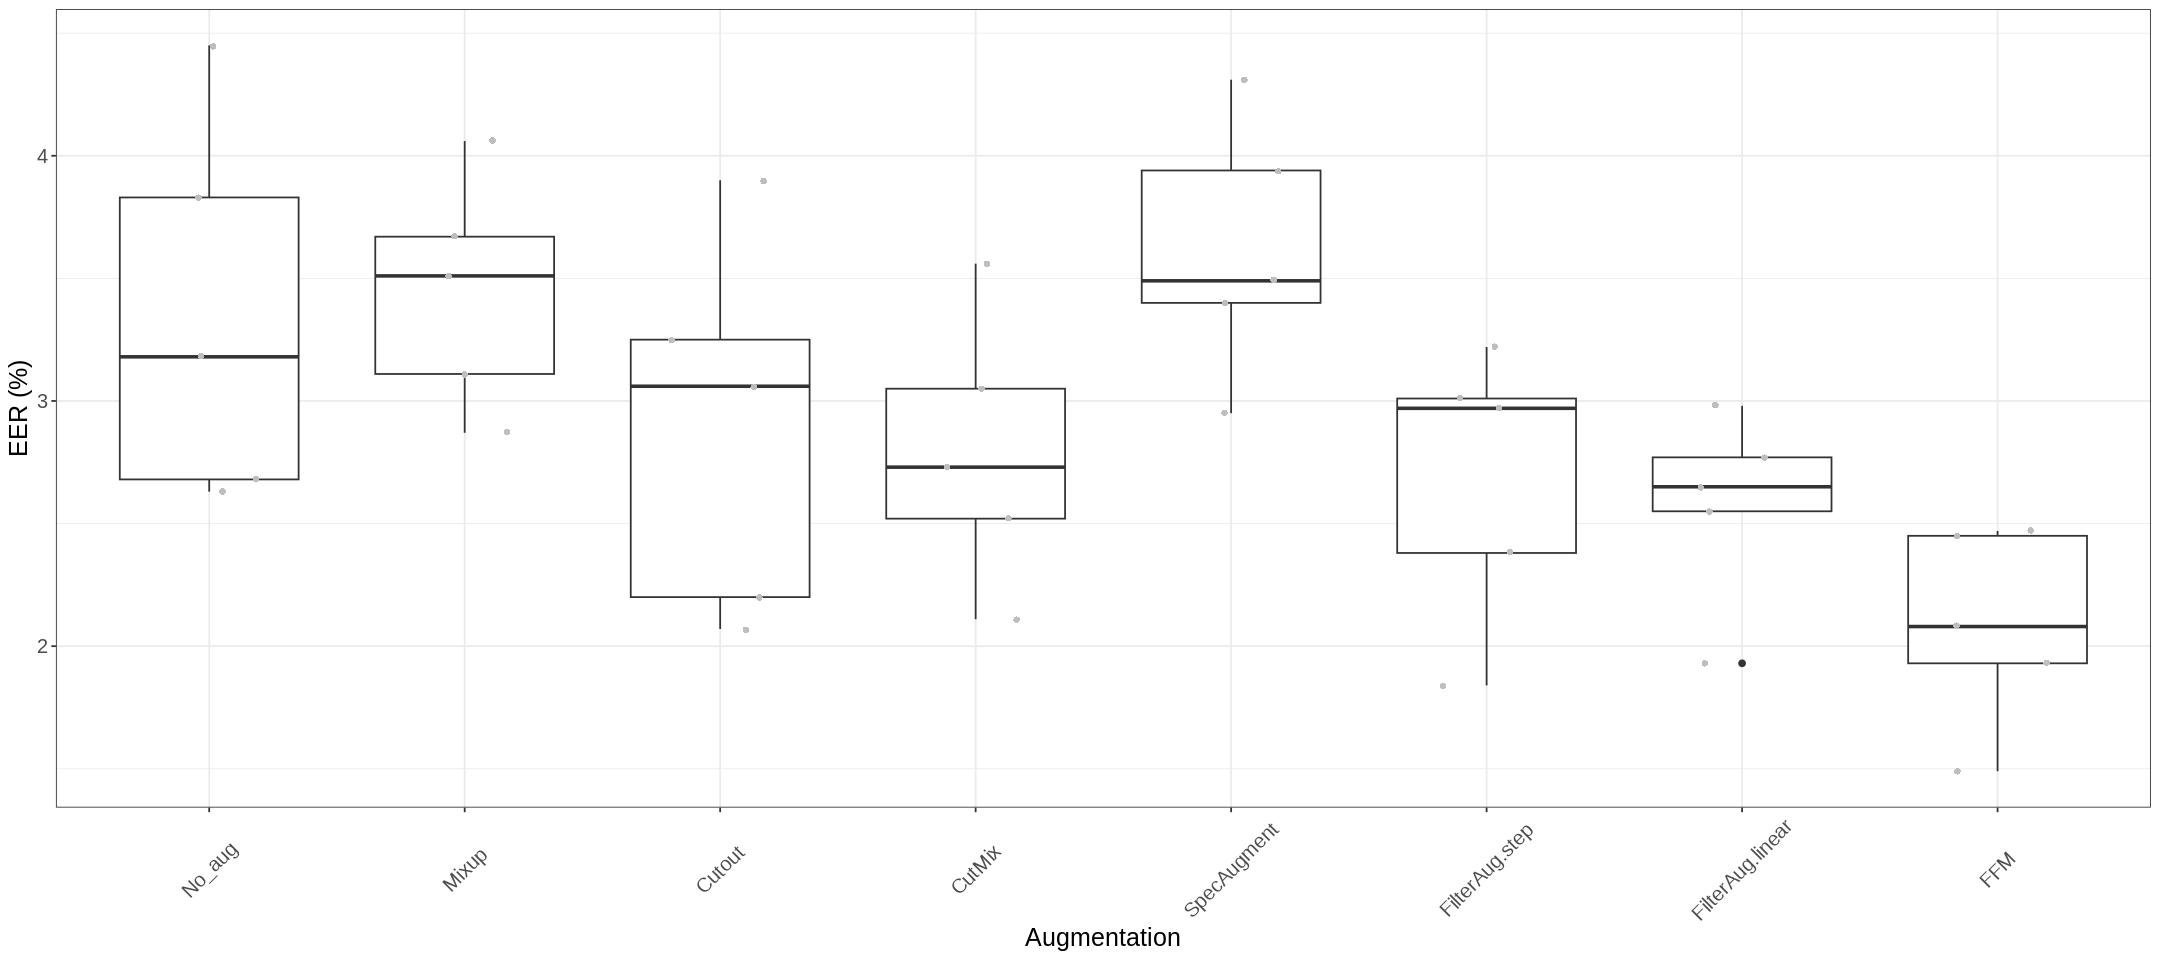

In [ ]:
newd %>% filter(Data == "ASV") %>%
   ggplot(aes(x = factor(Augment, levels = c("No_aug", "Mixup", "Cutout", "CutMix", "SpecAugment", "FilterAug.step", "FilterAug.linear", "FFM" )) ,y=EER)) + theme_bw() + #geom_violin() +
    geom_boxplot(width=0.7)+ geom_jitter(shape=16, position=position_jitter(0.2), color = "grey")+
  theme(axis.line = element_blank(),
#          panel.grid.major = element_blank(),
          panel.background = element_blank(),
          strip.background = element_blank(),
          axis.text.x = element_text(angle= 45, vjust = .5)
#          axis.text.y = element_blank()
  ) +
    theme(legend.position = "right", text = element_text(size = 15), plot.title = element_text(hjust = 0.5, size = 20) ) +
        xlab('Augmentation') + ylab('EER (%)') #+ ggtitle('M+LF, M+LF+RF worked best')

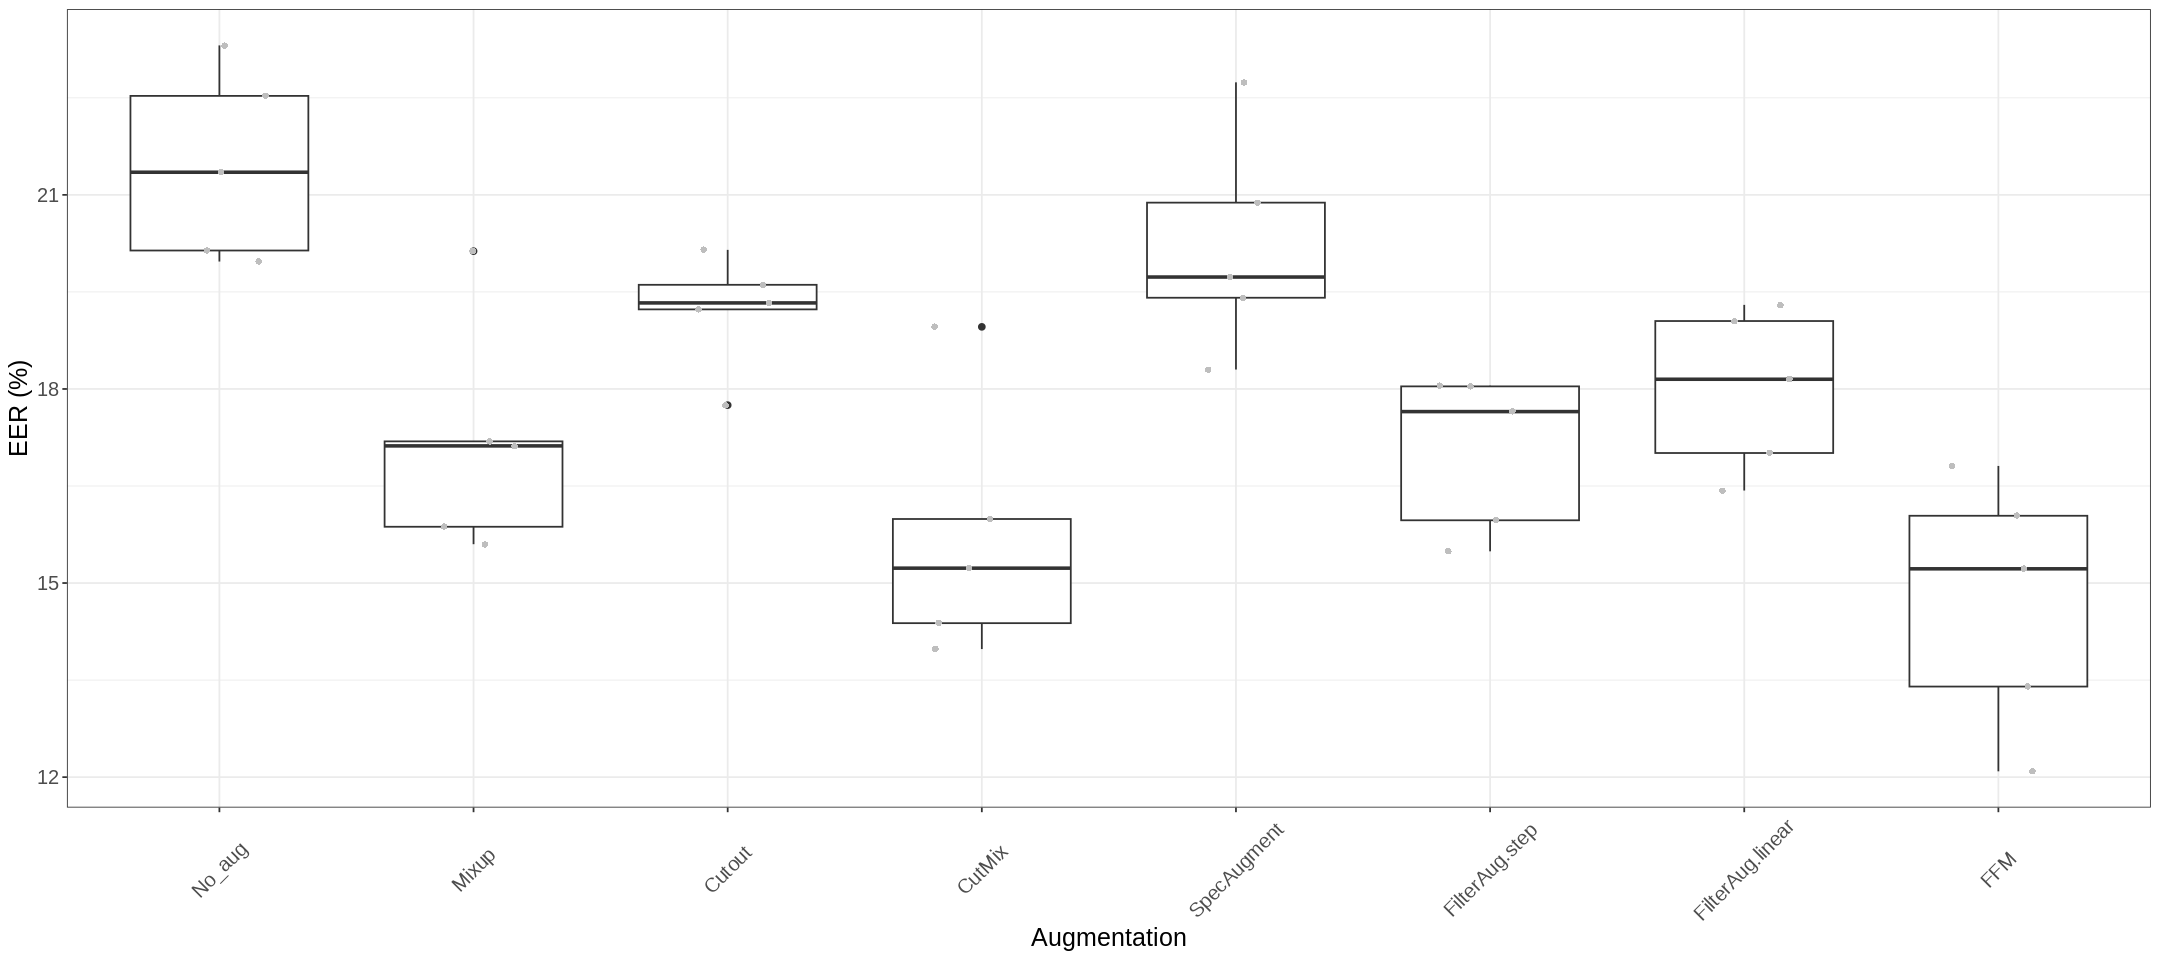

In [ ]:
newd %>% filter(Data == "ADD") %>%
   ggplot(aes(x = factor(Augment, levels = c("No_aug", "Mixup", "Cutout", "CutMix", "SpecAugment", "FilterAug.step", "FilterAug.linear", "FFM" )) ,y=EER)) + theme_bw() + #geom_violin() +
    geom_boxplot(width=0.7)+ geom_jitter(shape=16, position=position_jitter(0.2), color = "grey")+
  theme(axis.line = element_blank(),
#          panel.grid.major = element_blank(),
          panel.background = element_blank(),
          strip.background = element_blank(),
          axis.text.x = element_text(angle= 45, vjust = .5)
#          axis.text.y = element_blank()
  ) +
    theme(legend.position = "right", text = element_text(size = 15), plot.title = element_text(hjust = 0.5, size = 20) ) +
        xlab('Augmentation') + ylab('EER (%)') #+ ggtitle('M+LF, M+LF+RF worked best')